## Final Project Submission

Please fill out:
* Student name: Esra Guzel
* Student pace: full time
* Scheduled project review date/time: Fri, Mar 27, 2020, 9:30 AM - 10:15 AM (EASTERN)
* Instructor name: Abhineeth Kulkarni
* Blog post URL: https://esraguzel.github.io/king_county_house_data_how_does_location_affect_house_prices


In this project, I dealt with 'kc_house_data.csv' data which contains house prices from King County an area in the US State of Washington, this data also covers Seattle. To understand the data let's have a look at the information columns:

- id: unique identified for a house
- date: house was sold
- price: is prediction target
- bedrooms: number of Bedrooms/House
- bathrooms:  number of bathrooms/bedrooms
- sqft_livingsquare: footage of the home
- sqft_lotsquare: footage of the lot
- floors: floors (levels) in house
- waterfront: house which has a view to a waterfront
- view: has been viewed
- condition: how good the condition is ( Overall )
- grade: overall grade given to the housing unit, based on King County grading system
- sqft_above: square footage of house apart from basement
- sqft_basement: square footage of the basement
- yr_built: built year
- yr_renovated: year when house was renovated
- zipcode: zip
- lat: latitude coordinate
- long: longitude coordinate
- sqft_living15: the square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15: The square footage of the land lots of the nearest 15 neighbors


## Obtaining the Data

In [1]:
# Importing the necessary libraries to start with
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

df=pd.read_csv('kc_house_data.csv')

In [2]:
# Checking the data's first five rows
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [3]:
df.shape

(21597, 21)

## Scrubbing the Data

After obtaining our data, it is important to check the data type and missing values for each column. The 'date' and 'sqft_basement' columns are object which needs to be changed. Also, the top 5 frequent values are listed to have idea about the columns' values. This step is important to decide which column type will remain same and which will be changed to categorical data type. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
for col in df.columns:
    try:
        print(col, df[col].value_counts(normalize=True)[:5])
    except:
        print(col, df[col].value_counts(normalize=True))

    print('\n')

id 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64


date 6/23/2014    0.006575
6/25/2014    0.006066
6/26/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64


price 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
              ...   
870515.0    0.000046
336950.0    0.000046
386100.0    0.000046
176250.0    0.000046
884744.0    0.000046
Name: price, Length: 3622, dtype: float64


bedrooms 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64


bathrooms 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
1.50    0.066907
2.75    0.054869
3.00    0.034866
3.50    0.033847
3.25    0.027272
3.75    0.007177
4.00    0.006297
4.50    0.004630
4.25    0.003658
0.75    0.003287
4.75    0.001065
5.00    0.000972
Name: bathrooms, dt

In [6]:
# Checking for null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The 'waterfront', 'view' and 'yr_renovated' columns have missing values. Since the 'waterfront', 'yr_renovated' and 'view' columns contain 0 more than 90%, the missing values is filled with 0. 

In [7]:
# Filling missing values with 0
missing = ['waterfront', 'yr_renovated', 'view']
for cols in df[missing]:
    df[cols].fillna(value=0, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [9]:
# Dealing with the value ? in the 'sqft_basement' column
df['sqft_basement'].value_counts(normalize=True)

0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
768.0     0.000046
2580.0    0.000046
266.0     0.000046
2120.0    0.000046
1281.0    0.000046
Name: sqft_basement, Length: 304, dtype: float64

In [10]:
# Dropping rows with the value ?
df.drop(df.index[df['sqft_basement'] == '?'], inplace = True)

In [11]:
# Checking values again
df['sqft_basement'].value_counts(normalize=True)

0.0       0.606631
600.0     0.010263
500.0     0.009885
700.0     0.009838
800.0     0.009507
            ...   
768.0     0.000047
2580.0    0.000047
266.0     0.000047
2120.0    0.000047
1281.0    0.000047
Name: sqft_basement, Length: 303, dtype: float64

In [12]:
# Changing the data type to 'float'
df['sqft_basement'] = df['sqft_basement'].astype(str).astype(float)

In [13]:
# Changing the data type to 'datetime'
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y', errors='coerce')
df['date'].dtype

dtype('<M8[ns]')

In [14]:
# Checking the column
df['date'][:10]

0    2014-10-13
1    2014-12-09
2    2015-02-25
3    2014-12-09
4    2015-02-18
5    2014-05-12
7    2015-01-15
8    2015-04-15
9    2015-03-12
10   2015-04-03
Name: date, dtype: datetime64[ns]

When predicting house prices, months and seasons can be important. For this reason, I will add 'month' and 'season' columns to the dataframe. 

In [15]:
# Creating 'month' column 
df['month'] = df['date'].dt.month

In [16]:
# Creating 'season' column 
seasons = {
    12: 'winter',
    1: 'winter',
    2: 'winter',
    3: 'spring',
    4: 'spring',
    5: 'spring',
    6: 'summer',
    7: 'summer',
    8: 'summer',
    9: 'fall',
    10: 'fall',
    11: 'fall',
}
df['season'] = df['month'].replace(seasons)
df[['month', 'season']][:10]

        

month  season
0      10    fall
1      12  winter
2       2  winter
3      12  winter
4       2  winter
5       5  spring
7       1  winter
8       4  spring
9       3  spring
10      4  spring

In [17]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.114300e+04  2.114300e+04  21143.000000  21143.000000  21143.000000   
mean   4.581004e+09  5.405107e+05      3.372558      2.116079   2080.920730   
std    2.876328e+09  3.680751e+05      0.924917      0.768531    918.547562   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904940e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.309100e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.114300e+04  21143.000000  21143.000000  21143.000000  21143.000000   
mean   1.508714e+04      1.493591      0.006716      0.232654      3.409923   
std    4.120920e+04      0.539249      0.081679      0.764064      0.650498   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.043000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.620000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.069550e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

       ...    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  ...  21143.000000   21143.000000  21143.000000  21143.000000   
mean   ...   1789.069006     291.851724   1971.023223     68.256492   
std    ...    828.409769     442.498337     29.321938    362.765827   
min    ...    370.000000       0.000000   1900.000000      0.000000   
25%    ...   1200.000000       0.000000   1952.000000      0.000000   
50%    ...   1560.000000       0.000000   1975.000000      0.000000   
75%    ...   2210.000000     560.000000   1997.000000      0.000000   
max    ...   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  \
count  21143.000000  21143.000000  21143.000000    21143.00000   21143.000000   
mean   98077.868893     47.560274   -122.213876     1987.27139   12738.941967   
std       53.535756      0.138591      0.140597      685.67034   27169.273663   
min    98001.000000     47.155900   -122.519000      399.00000     651.000000   
25%    98033.000000     47.471250   -122.328000     1490.00000    5100.000000   
50%    98065.000000     47.572000   -122.230000     1840.00000    7626.000000   
75%    98117.000000     47.678200   -122.125000     2360.00000   10087.000000   
max    98199.000000     47.777600   -121.315000     6210.00000  871200.000000   

              month  
count  21143.000000  
mean       6.574658  
std        3.115428  
min        1.000000  
25%        4.000000  
50%        6.000000  
75%        9.000000  
max       12.000000  

[8 rows x 21 columns]

In [18]:
# Cheking for duplicated rows
duplicates = df[df.duplicated(subset=['id'])]
print(len(duplicates))
duplicates.head(10)

173


id       date      price  bedrooms  bathrooms  sqft_living  \
94    6021501535 2014-12-23   700000.0         3       1.50         1580   
314   4139480200 2014-12-09  1400000.0         4       3.25         4290   
325   7520000520 2015-03-11   240500.0         2       1.00         1240   
346   3969300030 2014-12-29   239900.0         4       1.00         1000   
372   2231500030 2015-03-24   530000.0         4       2.25         2180   
718   8820903380 2015-01-02   730000.0         6       2.25         2660   
824    726049190 2015-02-18   431000.0         3       1.00         1810   
837   8682262400 2015-05-13   419950.0         2       1.75         1350   
1085  9834200885 2015-04-20   550000.0         4       2.50         2080   
1128  8062900070 2015-02-13   369000.0         5       1.50         2550   

      sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
94        5000     1.0         0.0   0.0  ...          290.0      1939   
314      12103     1.0         0.0   3.0  ...         1600.0      1997   
325      12092     1.0         0.0   0.0  ...          280.0      1922   
346       7134     1.0         0.0   0.0  ...            0.0      1943   
372      10754     1.0         0.0   0.0  ...         1080.0      1954   
718      13579     2.0         0.0   0.0  ...            0.0      1937   
824       7200     1.0         0.0   0.0  ...          680.0      1954   
837       4003     1.0         0.0   0.0  ...            0.0      2004   
1085      4080     1.0         0.0   0.0  ...         1040.0      1962   
1128      6300     1.0         0.0   0.0  ...          990.0      1959   

      yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
94             0.0    98117  47.6870 -122.386           1570        4500   
314            0.0    98006  47.5503 -122.102           3860       11244   
325         1984.0    98146  47.4957 -122.352           1820        7460   
346            0.0    98178  47.4897 -122.240           1020        7138   
372            0.0    98133  47.7711 -122.341           1810        6929   
718         1990.0    98125  47.7142 -122.286           1120        8242   
824            0.0    98133  47.7493 -122.351           1810        8100   
837            0.0    98053  47.7176 -122.033           1350        4479   
1085           0.0    98144  47.5720 -122.290           1340        4080   
1128           0.0    98056  47.5014 -122.172           1380        6300   

      month  season  
94       12  winter  
314      12  winter  
325       3  spring  
346      12  winter  
372       3  spring  
718       1  winter  
824       2  winter  
837       5  spring  
1085      4  spring  
1128      2  winter  

[10 rows x 23 columns]

The 173 rows seems to be duplicated however there is a strong possibility that a house may changed ownership a few times and sold for different prices. Since the data is still valuable, it is better to keep the data.   

## Exploring the Data

### Dealing with the Categorical Data/Feature Engineering

It is essential to figure out which column should be evaluated as categorical data when predicting house prices. For this reason, I wanted to visualize the columns with scatter plot. 

In [19]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month'],
      dtype='object')

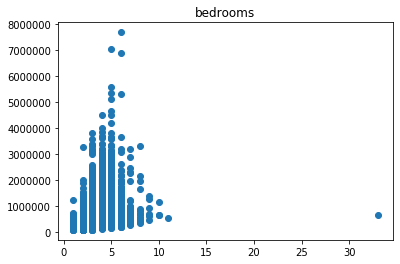

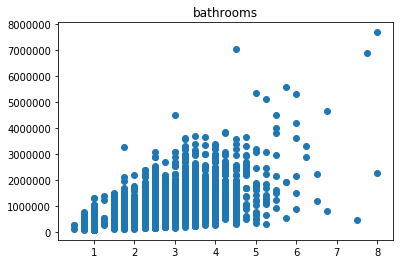

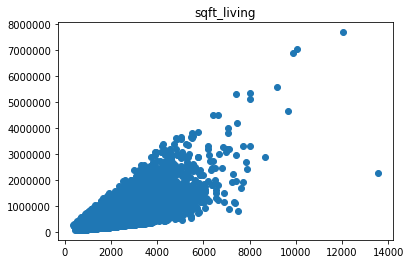

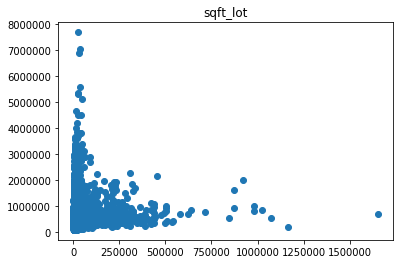

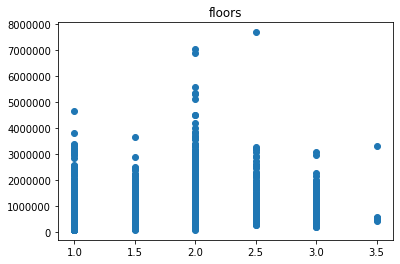

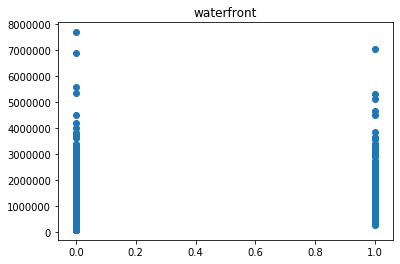

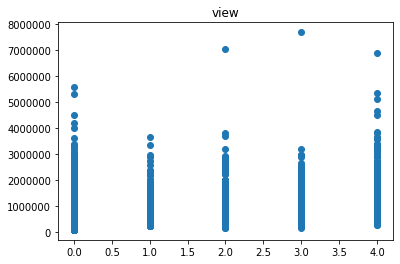

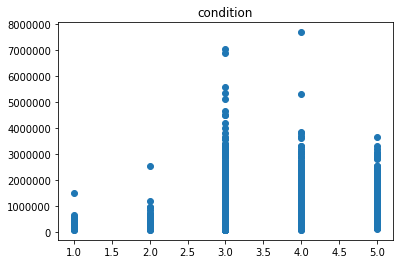

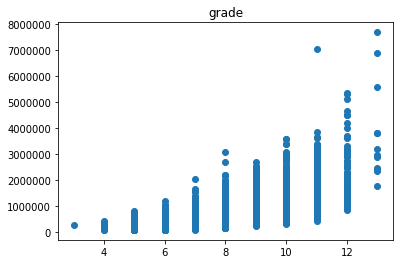

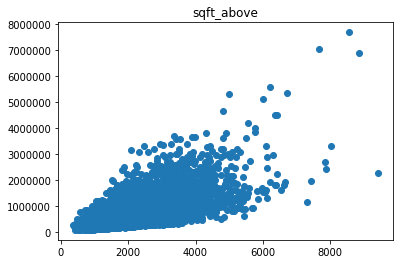

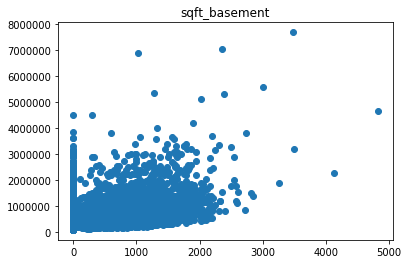

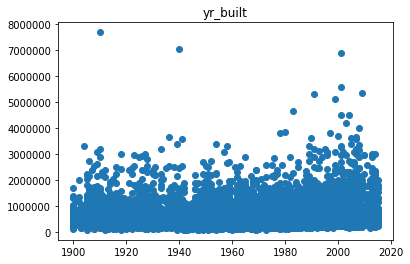

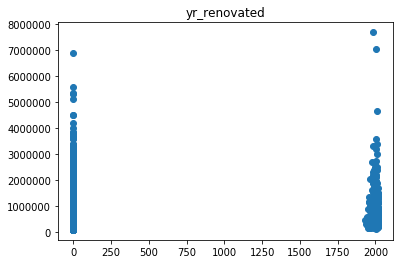

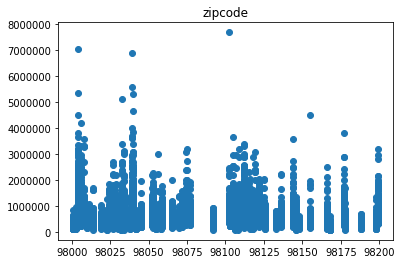

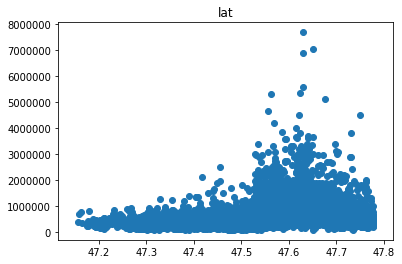

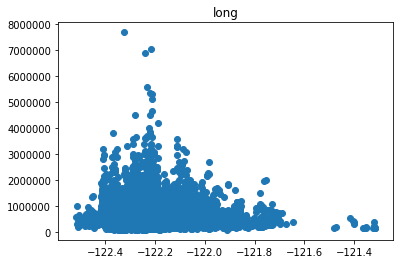

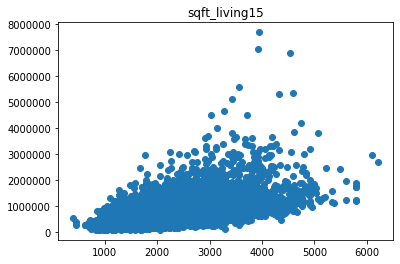

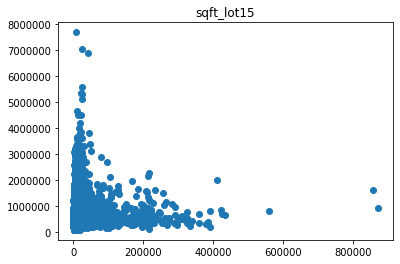

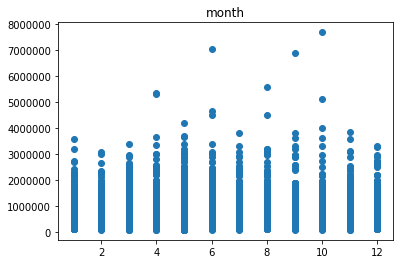

In [20]:
# Selecting number columns
num_cols = df.select_dtypes('number').columns
num_cols
# Visualizing the number columns
for col in num_cols[2:]:
    plt.scatter(df[col], df['price'])
    plt.title(col)
    plt.show()

Comments:
- 'bedrooms' column seems to have outliers. It may be evaluated as categorical value. 
- 'bathrooms' has balanced variety. It has a few outliers around 8. It is better to keep it as float. 
- It is obvious that 'sqft_living' has a linear relationship with price. It would be a good predictor after the outliers removed. 
- 'sqft_lot' can remain as integer. It may have a negative linearity with price.  
- It is clear that 'floors', 'waterfront', 'view' and 'condition' columns should be treated as categorical data. 
- 'grade' column shows great linearity. As a predictor it may have the highest coefficient. It can be treated as categorical. 
- 'sqft_above' and 'sqft_basement' columns show continuity and some linearity. 
- 'yr_built' shows continuity but not a clear positive linearity. It is observed that throughout the years the variance increased. 
- 'yr_renovated' and 'zipcode' columns should be treated as categorical data. 
- Tough 'lat' show some linearity both 'lat' and 'long' as well as 'zipcode' should be treated as categorical data. 

'yr_renovated' and 'sqft_basement' columns are suitable for categorical data type. With list comprehension the values other than zero are transformed into categorical data. 

In [21]:
# Changing the column type and filling the values with one except the 0 values
df['is_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
df[['yr_renovated','is_renovated']][:5]

yr_renovated  is_renovated
0           0.0             0
1        1991.0             1
2           0.0             0
3           0.0             0
4           0.0             0

In [22]:
# Changing the column type and filling the values with one except the 0 values
df['with_basement'] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
df[['sqft_basement','with_basement']][:5]

sqft_basement  with_basement
0            0.0              0
1          400.0              1
2            0.0              0
3          910.0              1
4            0.0              0

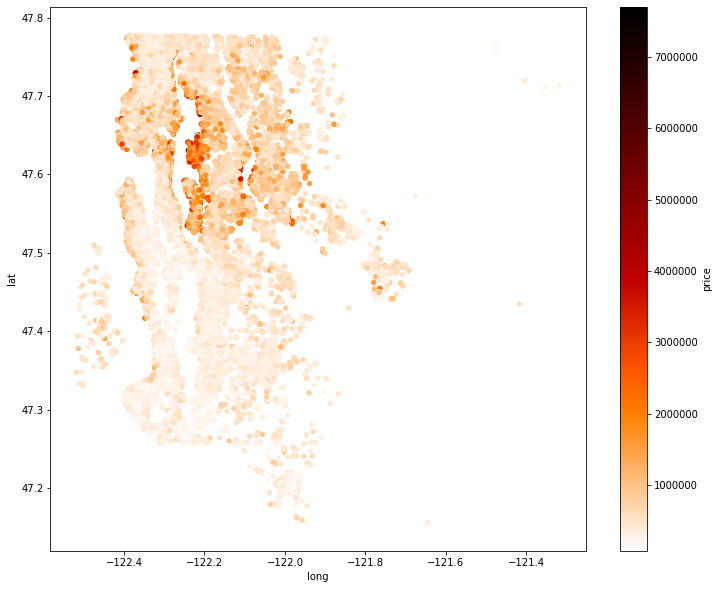

In [23]:
# Visualizing 'lat' and 'long' with a scatter plot
df.plot(kind="scatter", x="long", y="lat", figsize=(12, 10), c="price", 
             cmap="gist_heat_r", colorbar=True, sharex=False);
plt.show();

In [24]:
# Zipping the 'lat' and 'long'
zipped = list(zip(df.lat, df.long))
zipped[0]

(47.5112, -122.257)

In [25]:
# Creating directions for each geographical point
new = []
for z in zipped:

    if (z[0] >= 47.5) & (z[1] <= -122.1):
        new.append('NW')
    elif (z[0] >= 47.5) & (z[1] > -122.1):
        new.append('NE')
    elif (z[0] < 47.5) & (z[1] <= -122.1):
        new.append('SW')
    else:
        new.append('SE')

new[:10]

['NW', 'NW', 'NW', 'NW', 'NE', 'NE', 'SW', 'NW', 'SE', 'NW']

In [26]:
# Adding the list of direction in df
df['direction'] = new

df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  zipcode      lat     long  \
0      5650     1.0         0.0   0.0  ...    98178  47.5112 -122.257   
1      7242     2.0         0.0   0.0  ...    98125  47.7210 -122.319   
2     10000     1.0         0.0   0.0  ...    98028  47.7379 -122.233   
3      5000     1.0         0.0   0.0  ...    98136  47.5208 -122.393   
4      8080     1.0         0.0   0.0  ...    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  month  season  is_renovated  with_basement  \
0           1340        5650     10    fall             0              0   
1           1690        7639     12  winter             1              1   
2           2720        8062      2  winter             0              0   
3           1360        5000     12  winter             0              1   
4           1800        7503      2  winter             0              0   

   direction  
0         NW  
1         NW  
2         NW  
3         NW  
4         NE  

[5 rows x 26 columns]

In [27]:
# Checking a random direction 
df[df['direction']=='SW'].head()

id       date     price  bedrooms  bathrooms  sqft_living  \
7   2008000270 2015-01-15  291850.0         3       1.50         1060   
19  7983200060 2015-04-24  230000.0         3       1.00         1250   
22  7137970340 2014-07-03  285000.0         5       2.50         2270   
23  8091400200 2014-05-16  252700.0         2       1.50         1070   
24  3814700200 2014-11-20  329000.0         3       2.25         2450   

    sqft_lot  floors  waterfront  view  ...  zipcode      lat     long  \
7       9711     1.0         0.0   0.0  ...    98198  47.4095 -122.315   
19      9774     1.0         0.0   0.0  ...    98003  47.3343 -122.306   
22      6300     2.0         0.0   0.0  ...    98092  47.3266 -122.169   
23      9643     1.0         0.0   0.0  ...    98030  47.3533 -122.166   
24      6500     2.0         0.0   0.0  ...    98030  47.3739 -122.172   

    sqft_living15  sqft_lot15  month  season  is_renovated  with_basement  \
7            1650        9711      1  winter             0              0   
19           1280        8850      4  spring             0              0   
22           2240        7005      7  summer             0              0   
23           1220        8386      5  spring             0              0   
24           2200        6865     11    fall             0              0   

    direction  
7          SW  
19         SW  
22         SW  
23         SW  
24         SW  

[5 rows x 26 columns]

In [28]:
# Changing the data types to category
df['waterfront'] = df['waterfront'].astype('category')
df['view'] =df['view'].astype('category')
df['season'] = df['season'].astype('category')
df['is_renovated'] = df['is_renovated'].astype('category')
df['floors']=df['floors'].astype('category')
df['condition']=df['condition'].astype('category')
df['month']=df['month'].astype('category')
df['grade']=df['grade'].astype('category')
df['with_basement'] = df['with_basement'].astype('category')
df['bedrooms'] = df['bedrooms'].astype('category')
df['direction']= df['direction'].astype('category')

At this point, visualizations can help understanding categorical data. cat_col list created to iterate over to visualize the categorical data columns. 

In [29]:
cat_col=['waterfront', 'view', 'season', 'is_renovated', 'floors', 'condition', 'direction', 'grade', 'with_basement', 'bedrooms']

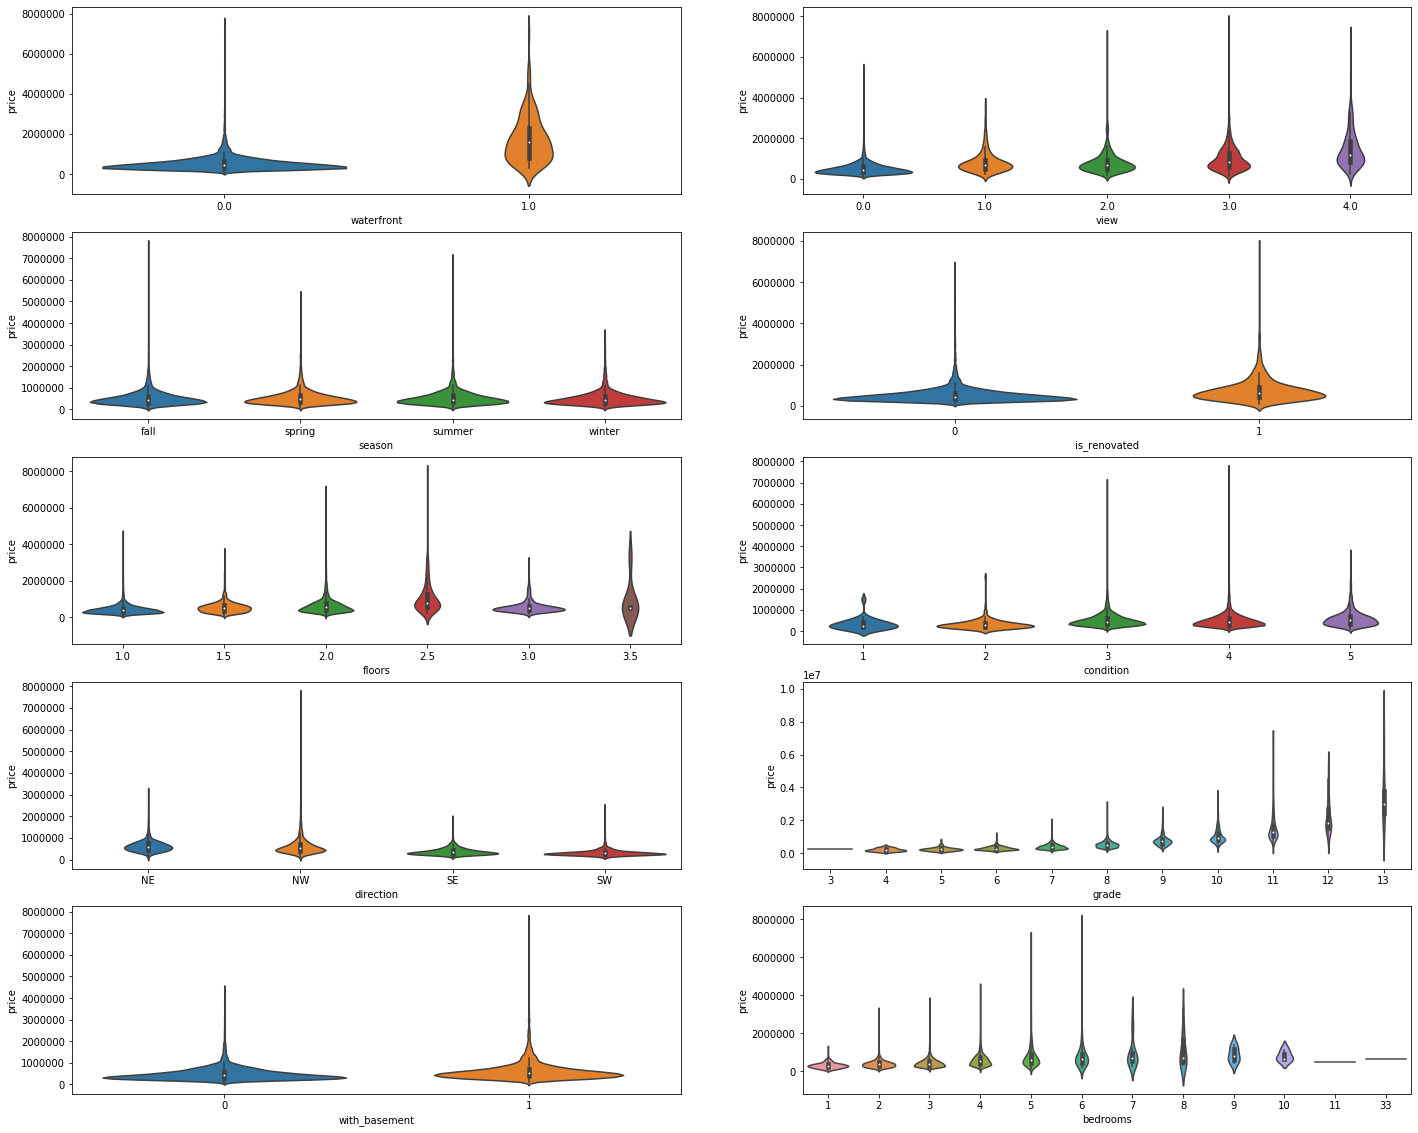

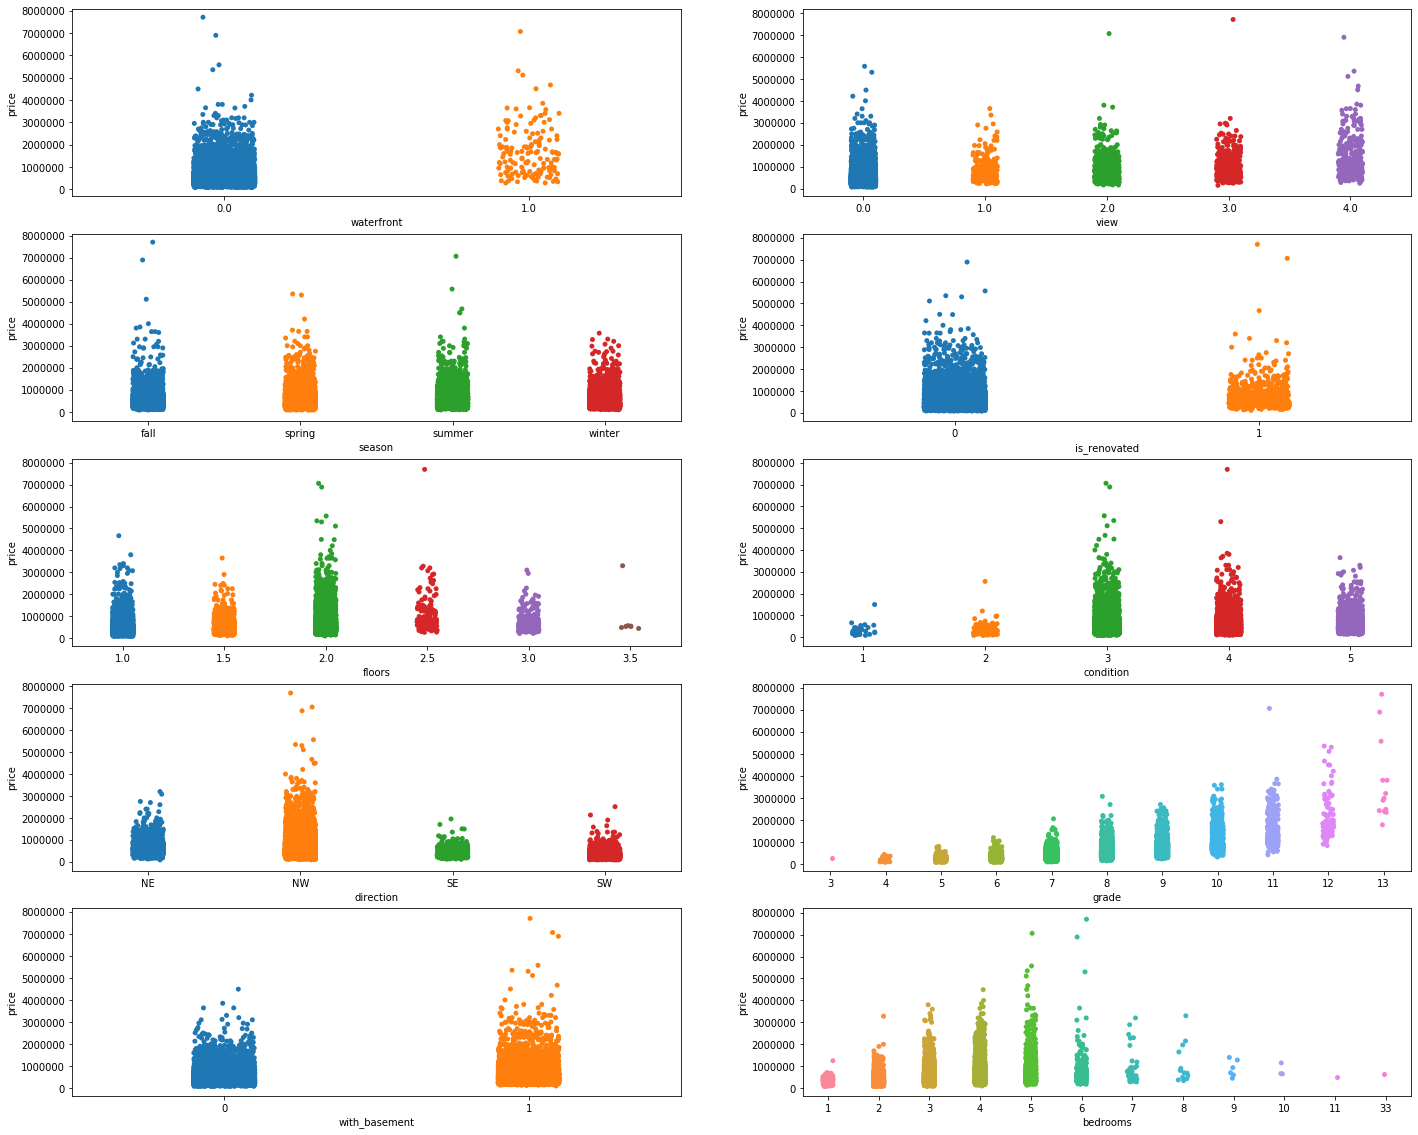

In [30]:
fig, ax1 = plt.subplots(5, 2, figsize=(24,20))
ax1 = ax1.flatten()
fig, ax2 = plt.subplots(5, 2, figsize=(24,20))
ax2 = ax2.flatten()
for c, col in enumerate(cat_col):
    
    sns.violinplot(x=col, y="price", data=df, ax=ax1[c]);
    sns.catplot(x=col, y="price", data=df, ax=ax2[c]);

    plt.close(3)
    plt.close(4)
    
plt.show()

Comments:

- Bedrooms: There is slight increase in median as the number of bedrooms increases. The house with 33 bedrooms should be dropped. After 6 bedroom the variance and house prices decreases.   
- Waterfront: The violin plot shows that houses with waterfront tend to have much higher median and better distribution compared to houses with no waterfront. After removing the outliers it may be a good predictor since the houses with waterfront tend to have higher prices.
- View: The median of the view slightly increases as the view number increases but houses with 0 view are sold more compared the rest of the views. Except view number 1, it has outliers in every view number. 
- Floor: Floor's median starts to decrease after the 2.5 floor. If we have a closer look  at the catplot 2.5 floor has outliers which increases the median of the floor. Actually, the floor data becomes less predictive after 2 floor.   
- Condition: The condition's interaction with price is not as expected. The median of condition shows slight increase as the condition increases. The prices are higher at condition 3 and condition 4 and interestingly lower at condition 5. 
- Season: The median value for each season are almost the same. While fall, spring and summer has a bunch of outliers, winter season doesn't have any. It is not a good a good predictor contrary to expectations. 
- Direction: For each direction the price range and variance changes. This indicates that directions may be a good predictor. 
- Is_renovated:  Renovated houses' prices are seem to get higher due to outliers. Renovated houses have higher variance compared to not renovated houses.  
- Grade: Among other categorical variables, grade look like the most promising one. The median and the house prices increase as the grade increases. It has a clear linear relation with price. Not only variance but also price distribution changes across different grade values. This indicates grade feature's huge potential as a strong predictor. 
- With_basement: The houses with basement has higher variance and tend to have higher prices compared to with no basement.

### Cleaning the Outliers

The `clean_outliers` function defined to detect and remove the outliers. `iqr_denominator` set to 3 to keep as much as data possible in our dataset.      

In [31]:
# Defining a function to clean outliers
def clean_outliers(df, col, iqr_denominator):
    
    # Calculating the IQR for the each column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f'IQR for column {col} is: {IQR}')
    
    df = df[~(
        (df[col] < (Q1 - iqr_denominator * IQR))
        |
        (df[col] > (Q3 + iqr_denominator * IQR))
    )]
    
    print(f'Number of rows after removing outliers: {df.shape[0]}')
    
    return df

In [32]:
# Applying the funtion
iqr_denominator = 3
con_cols = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
df_cleaned = df.copy(deep=True)

for col in con_cols:
    df_cleaned = clean_outliers(df_cleaned, col, iqr_denominator)


IQR for column price is: 323000.0
Number of rows after removing outliers: 20728
IQR for column sqft_living is: 1090.0
Number of rows after removing outliers: 20697
IQR for column sqft_lot is: 5460.0
Number of rows after removing outliers: 19008
IQR for column sqft_above is: 910.0
Number of rows after removing outliers: 18995
IQR for column sqft_basement is: 540.0
Number of rows after removing outliers: 18982
IQR for column sqft_living15 is: 790.0
Number of rows after removing outliers: 18966
IQR for column sqft_lot15 is: 4269.0
Number of rows after removing outliers: 18753


In [33]:
df_cleaned.shape

(18753, 26)

In [34]:
# Removing the possible typo error
df_cleaned['bedrooms'] = df_cleaned['bedrooms'].replace(33, 3)
df_cleaned['bedrooms'].unique()


[3, 2, 4, 5, 1, ..., 7, 8, 9, 11, 10]
Length: 11
Categories (11, int64): [3, 2, 4, 5, ..., 8, 9, 11, 10]

In [35]:
df_cleaned.head()

id       date     price bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520 2014-10-13  221900.0        3       1.00         1180      5650   
1  6414100192 2014-12-09  538000.0        3       2.25         2570      7242   
2  5631500400 2015-02-25  180000.0        2       1.00          770     10000   
3  2487200875 2014-12-09  604000.0        4       3.00         1960      5000   
4  1954400510 2015-02-18  510000.0        3       2.00         1680      8080   

  floors waterfront view  ... zipcode      lat     long  sqft_living15  \
0    1.0        0.0  0.0  ...   98178  47.5112 -122.257           1340   
1    2.0        0.0  0.0  ...   98125  47.7210 -122.319           1690   
2    1.0        0.0  0.0  ...   98028  47.7379 -122.233           2720   
3    1.0        0.0  0.0  ...   98136  47.5208 -122.393           1360   
4    1.0        0.0  0.0  ...   98074  47.6168 -122.045           1800   

   sqft_lot15  month  season  is_renovated  with_basement  direction  
0        5650     10    fall             0              0         NW  
1        7639     12  winter             1              1         NW  
2        8062      2  winter             0              0         NW  
3        5000     12  winter             0              1         NW  
4        7503      2  winter             0              0         NE  

[5 rows x 26 columns]

In [36]:
# Creating dummy variable for categorical data
df_cleaned_view_dummy = pd.get_dummies(df_cleaned['view'], prefix='vw', drop_first=True)
df_cleaned_condition_dummy = pd.get_dummies(df_cleaned['condition'], prefix='condition', drop_first=True)
df_cleaned_floors_dummy = pd.get_dummies(df_cleaned['floors'], prefix='floor')
df_cleaned_floors_dummy.drop(columns=['floor_3.5'], inplace=True)
df_cleaned_season_dummy = pd.get_dummies(df_cleaned['season'])
df_cleaned_season_dummy.drop(columns = ['winter'], inplace=True)
df_cleaned_season_dummy.head()
df_cleaned_grade_dummy=pd.get_dummies(df_cleaned['grade'], prefix='gr')
df_cleaned_grade_dummy.drop(columns = ['gr_13'], inplace=True)
df_cleaned_bedrooms_dummy = pd.get_dummies(df_cleaned['bedrooms'], prefix='bedroom')
df_cleaned_bedrooms_dummy.drop(columns=['bedroom_33'], inplace=True)
df_cleaned_direction_dummy = pd.get_dummies(df_cleaned['direction'])
df_cleaned_direction_dummy.drop(columns = ['SE'], inplace=True)


In [37]:
# Cleaning the column names
df_cleaned_view_dummy.rename(columns={
    'vw_1.0':'vw_1',
    'vw_2.0': 'vw_2',
    'vw_3.0': 'vw_3',
    'vw_4.0': 'vw_4'
}, inplace=True)
display(df_cleaned_view_dummy.head())

df_cleaned_floors_dummy.rename(columns={
    'floor_1.0': 'floor_1',
    'floor_1.5':'floor_1_5',
    'floor_2.0': 'floor_2',
    'floor_2.5': 'floor_2_5',
    'floor_3.0': 'floor_3'
}, inplace=True)
df_cleaned_floors_dummy.head()

vw_1  vw_2  vw_3  vw_4
0     0     0     0     0
1     0     0     0     0
2     0     0     0     0
3     0     0     0     0
4     0     0     0     0

floor_1  floor_1_5  floor_2  floor_2_5  floor_3
0        1          0        0          0        0
1        0          0        1          0        0
2        1          0        0          0        0
3        1          0        0          0        0
4        1          0        0          0        0

The columns 'lat', 'long', 'zipcode' and 'direction' are separated for further analysis to observe the effect of location on house prices.  

The continuous and categorical data merged into two separate detaframe as `df_cat` and `df_con`. This separation will make easier to work on the datasets. 

In [38]:
# Merging the categorical data 
df_cat = pd.concat(
    [
        df_cleaned_view_dummy,
        df_cleaned_condition_dummy,
        df_cleaned_floors_dummy,
        df_cleaned_season_dummy,
        df_cleaned['is_renovated'],
        df_cleaned['waterfront'],
        df_cleaned_grade_dummy,
        df_cleaned['with_basement'],
        df_cleaned_bedrooms_dummy
    ], axis = 1)

df_cat.head()

vw_1  vw_2  vw_3  vw_4  condition_2  condition_3  condition_4  condition_5  \
0     0     0     0     0            0            1            0            0   
1     0     0     0     0            0            1            0            0   
2     0     0     0     0            0            1            0            0   
3     0     0     0     0            0            0            0            1   
4     0     0     0     0            0            1            0            0   

   floor_1  floor_1_5  ...  bedroom_2  bedroom_3  bedroom_4  bedroom_5  \
0        1          0  ...          0          1          0          0   
1        0          0  ...          0          1          0          0   
2        1          0  ...          1          0          0          0   
3        1          0  ...          0          0          1          0   
4        1          0  ...          0          1          0          0   

   bedroom_6  bedroom_7 bedroom_8 bedroom_9  bedroom_10  bedroom_11  
0          0          0         0         0           0           0  
1          0          0         0         0           0           0  
2          0          0         0         0           0           0  
3          0          0         0         0           0           0  
4          0          0         0         0           0           0  

[5 rows x 40 columns]

In [39]:
df_cat.shape

(18753, 40)

In [40]:
# Merging the continuous data
df_con = df_cleaned[
    [
        'price',
        'sqft_living',
        'sqft_lot',
        'sqft_above',
        'sqft_living15',
        'sqft_lot15', 
        'bathrooms',
        'yr_built'
    ]
].astype(float).copy(deep=True)

In [41]:
df_con.shape

(18753, 8)

### Normalizing the Distributions

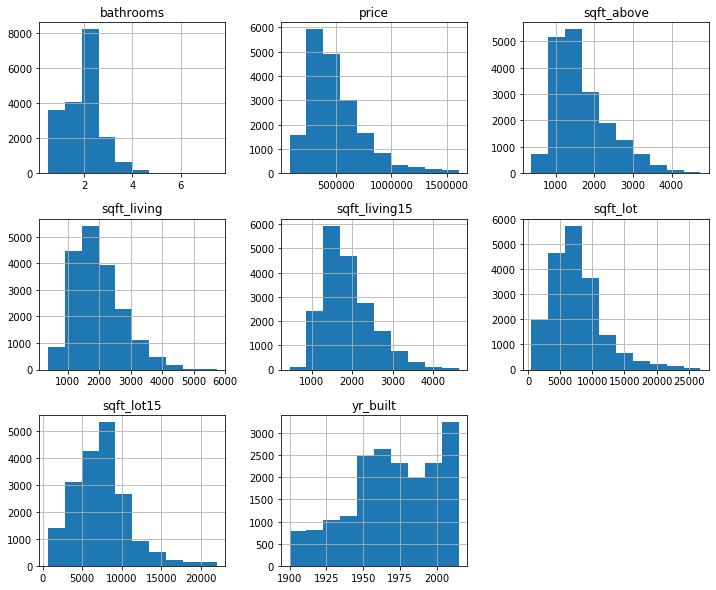

In [42]:
# Checking the distribution for continuous data
df_con.hist(figsize=(12,10));

The continuous columns distributions are skewed and needs to be normalized. To improve the linear regression model's performance the data distribution is normalized for continuous data types by calculating the log for each column.

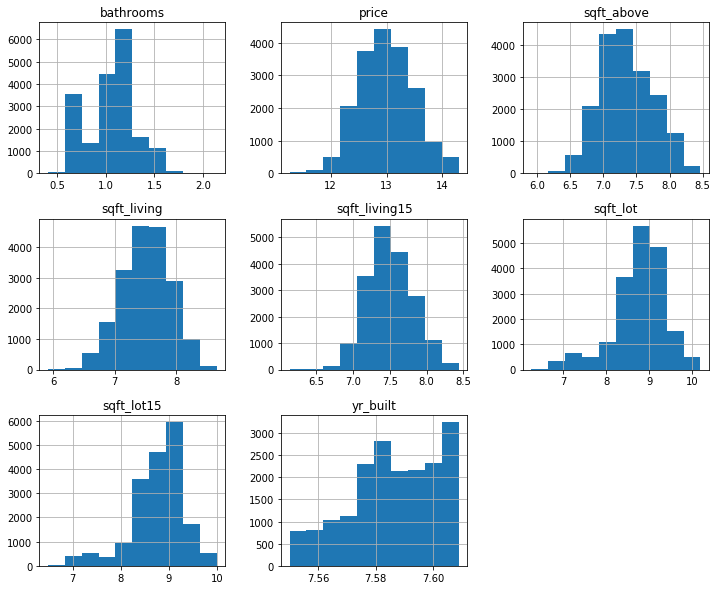

In [43]:
# Calculating the log for continuous columns
import numpy as np
df_log = (np.log1p(df_con)).replace(-np.inf, 0)
df_log.hist(figsize=(12,10))
plt.show()

### Checking for Multicollinearity

Scatter matrix is used to detect high correlation between the independent variables. High correlation can lead to multicollinearity and affect the performance of the model.

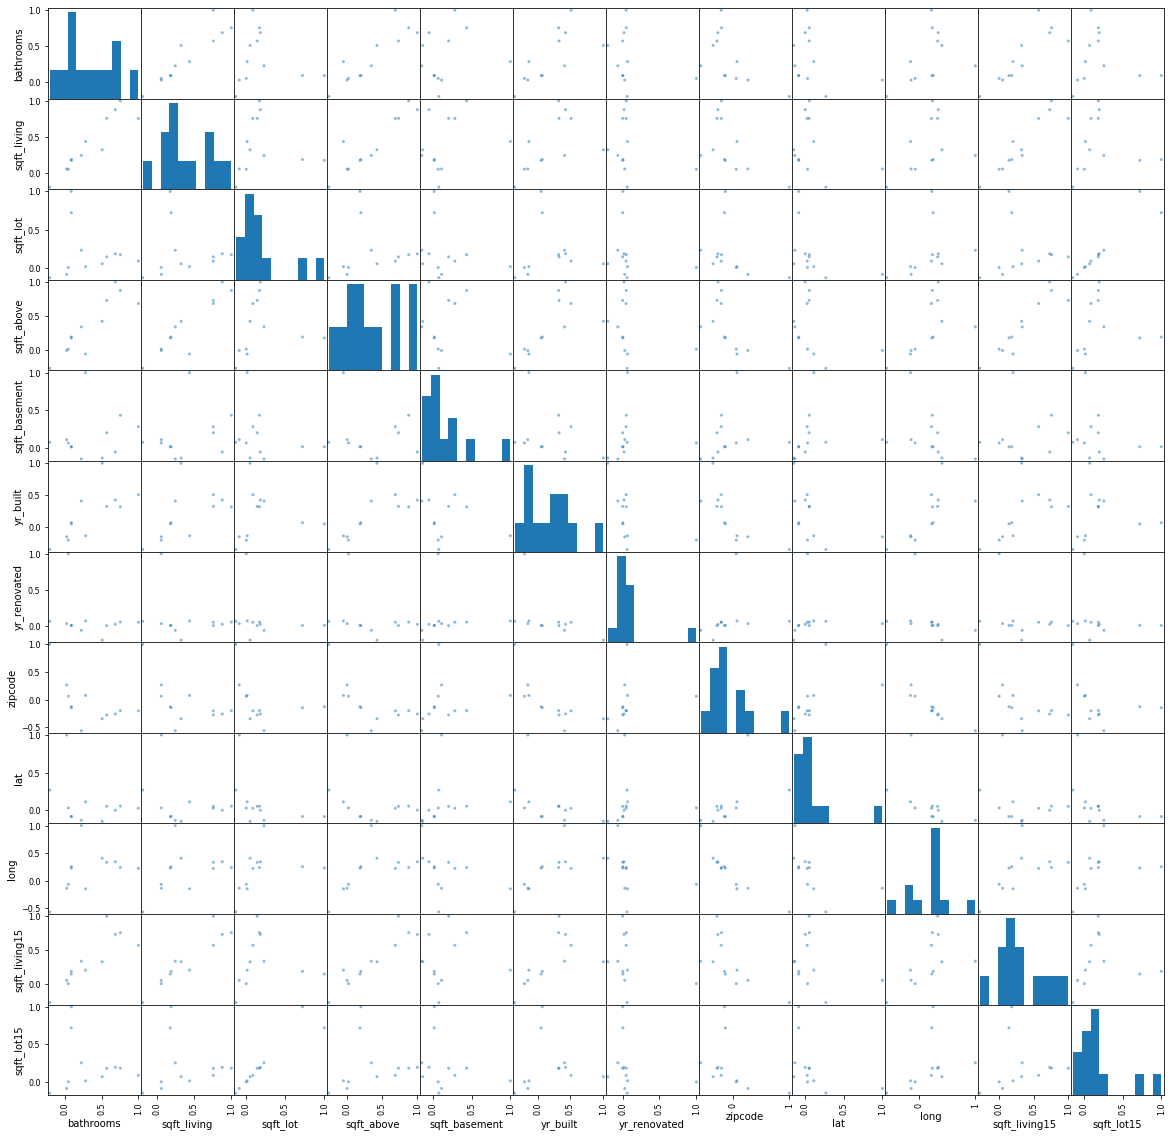

In [44]:
df_corr = df.iloc[:,3:24].corr()
pd.plotting.scatter_matrix(df_corr,figsize  = [20, 20]);
plt.show()

Here, some correlation can be observed between some variables. The `corr()` function is used to detect high correlation. Any value higher than 0.75 indicates high correlation. 

In [45]:
# Checking for multicollinearity
df_corr = df.iloc[:,3:24].corr()
df_corr

bathrooms  sqft_living  sqft_lot  sqft_above  sqft_basement  \
bathrooms       1.000000     0.755278  0.087884    0.686456       0.282693   
sqft_living     0.755278     1.000000  0.172941    0.876678       0.434576   
sqft_lot        0.087884     0.172941  1.000000    0.183461       0.015533   
sqft_above      0.686456     0.876678  0.183461    1.000000      -0.052293   
sqft_basement   0.282693     0.434576  0.015533   -0.052293       1.000000   
yr_built        0.508408     0.319461  0.052768    0.425180      -0.132844   
yr_renovated    0.047955     0.049964  0.004182    0.019535       0.067145   
zipcode        -0.204306    -0.198906 -0.129355   -0.260814       0.075381   
lat             0.024994     0.052986 -0.085457   -0.000346       0.110637   
long            0.224479     0.240797  0.230583    0.344543      -0.145174   
sqft_living15   0.570129     0.756389  0.143428    0.731016       0.201579   
sqft_lot15      0.088834     0.184466  0.720649    0.195638       0.016660   

               yr_built  yr_renovated   zipcode       lat      long  \
bathrooms      0.508408      0.047955 -0.204306  0.024994  0.224479   
sqft_living    0.319461      0.049964 -0.198906  0.052986  0.240797   
sqft_lot       0.052768      0.004182 -0.129355 -0.085457  0.230583   
sqft_above     0.425180      0.019535 -0.260814 -0.000346  0.344543   
sqft_basement -0.132844      0.067145  0.075381  0.110637 -0.145174   
yr_built       1.000000     -0.200377 -0.347320 -0.148725  0.409317   
yr_renovated  -0.200377      1.000000  0.061752  0.029435 -0.064200   
zipcode       -0.347320      0.061752  1.000000  0.267070 -0.564092   
lat           -0.148725      0.029435  0.267070  1.000000 -0.135183   
long           0.409317     -0.064200 -0.564092 -0.135183  1.000000   
sqft_living15  0.325447      0.001286 -0.278006  0.050441  0.334270   
sqft_lot15     0.071408      0.002708 -0.146709 -0.084984  0.255557   

               sqft_living15  sqft_lot15  
bathrooms           0.570129    0.088834  
sqft_living         0.756389    0.184466  
sqft_lot            0.143428    0.720649  
sqft_above          0.731016    0.195638  
sqft_basement       0.201579    0.016660  
yr_built            0.325447    0.071408  
yr_renovated        0.001286    0.002708  
zipcode            -0.278006   -0.146709  
lat                 0.050441   -0.084984  
long                0.334270    0.255557  
sqft_living15       1.000000    0.183089  
sqft_lot15          0.183089    1.000000

In [46]:
abs(df_corr) > 0.75

bathrooms  sqft_living  sqft_lot  sqft_above  sqft_basement  \
bathrooms           True         True     False       False          False   
sqft_living         True         True     False        True          False   
sqft_lot           False        False      True       False          False   
sqft_above         False         True     False        True          False   
sqft_basement      False        False     False       False           True   
yr_built           False        False     False       False          False   
yr_renovated       False        False     False       False          False   
zipcode            False        False     False       False          False   
lat                False        False     False       False          False   
long               False        False     False       False          False   
sqft_living15      False         True     False       False          False   
sqft_lot15         False        False     False       False          False   

               yr_built  yr_renovated  zipcode    lat   long  sqft_living15  \
bathrooms         False         False    False  False  False          False   
sqft_living       False         False    False  False  False           True   
sqft_lot          False         False    False  False  False          False   
sqft_above        False         False    False  False  False          False   
sqft_basement     False         False    False  False  False          False   
yr_built           True         False    False  False  False          False   
yr_renovated      False          True    False  False  False          False   
zipcode           False         False     True  False  False          False   
lat               False         False    False   True  False          False   
long              False         False    False  False   True          False   
sqft_living15     False         False    False  False  False           True   
sqft_lot15        False         False    False  False  False          False   

               sqft_lot15  
bathrooms           False  
sqft_living         False  
sqft_lot            False  
sqft_above          False  
sqft_basement       False  
yr_built            False  
yr_renovated        False  
zipcode             False  
lat                 False  
long                False  
sqft_living15       False  
sqft_lot15           True

Above, the boolean True shows that there is high correlation between 'sqft_living', 'bathrooms', 'sqft_living15', 'sqft_lot', 'sqft_above'. Dropping the columns will be considered before model validation.  

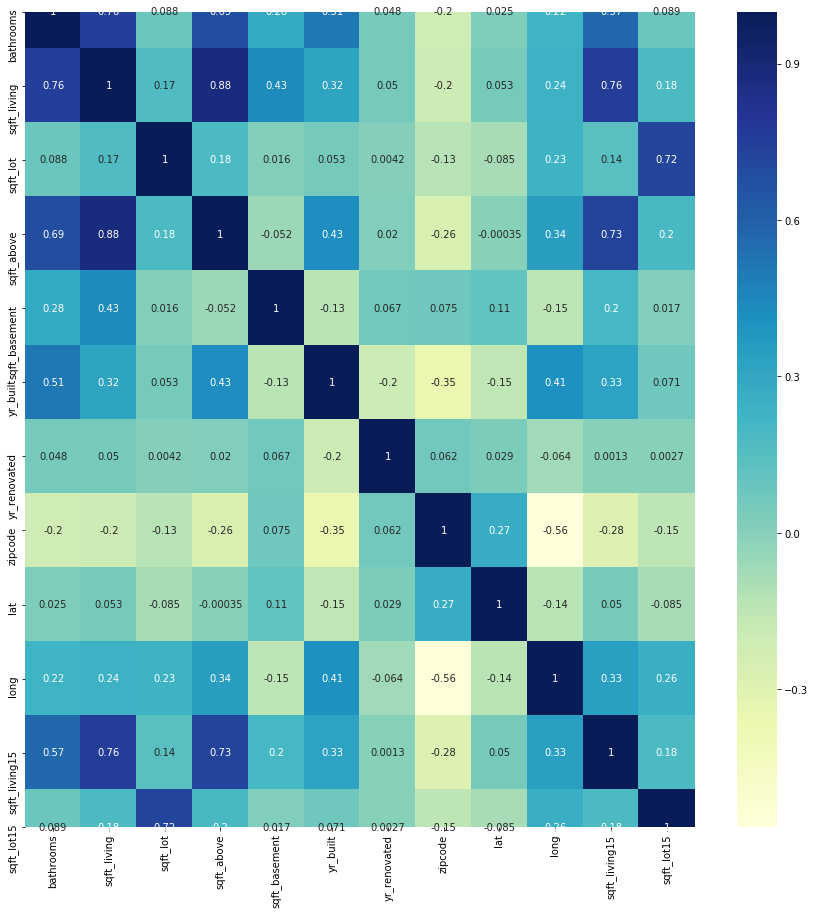

In [47]:
# Creating a heatmap
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(df_corr, cmap="YlGnBu", annot=True);

### Inspecting Linearity

Before fitting the model, let's explore our dependent variable's ('price') relationship with the independent variables.

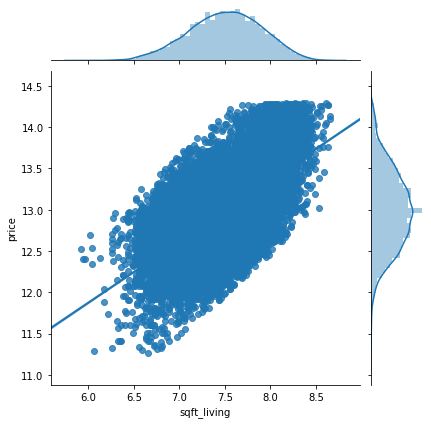

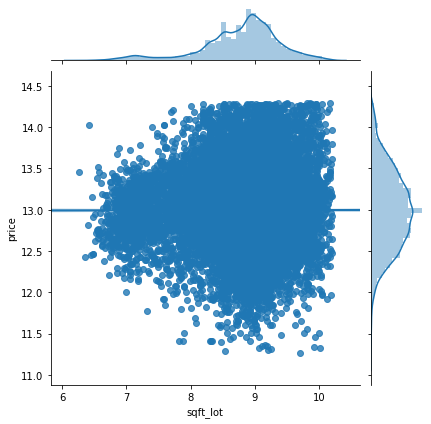

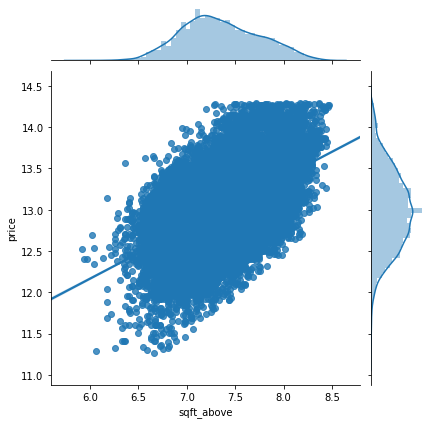

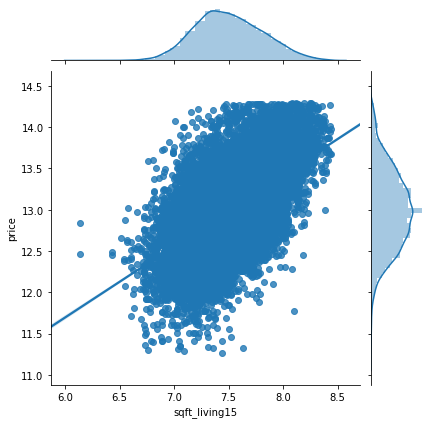

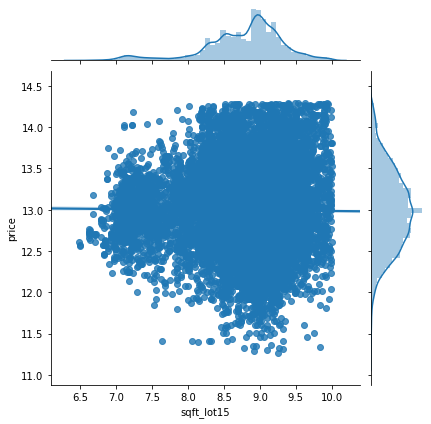

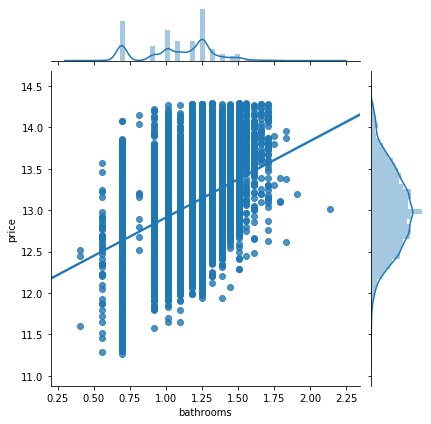

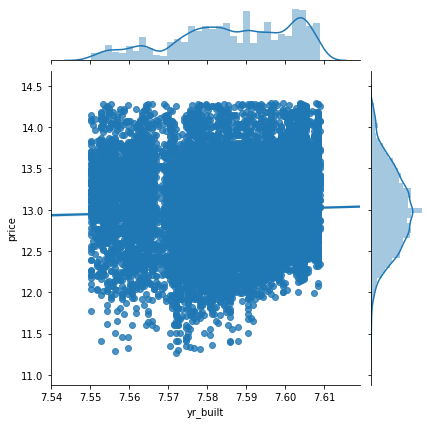

In [48]:
for col in df_log.columns[1:]:
    sns.jointplot(col, 'price', data=df_log, kind='reg');

Comments:

- By looking at the visualizations, it can be clearly observed that the columns 'sqft_living', 'bathrooms' and 'sqft_living15' has linear relationship with 'price'. 
- 'sqft_lot15', 'yr_bulit' and 'sqft_lot' doesn't show the same amount of linearity.

### Q1: What Are the Top Five Zip codes? How Does Location Affect House Prices?

With the first question location's affect on house prices are explored. For the first part of the question, the `groupby()` function is used to group zip codes and the average price calculated for each zip code and plotted with a bar graph. During grouping the price by zip codes, the `mean()` function is used to reach unbiased results. 

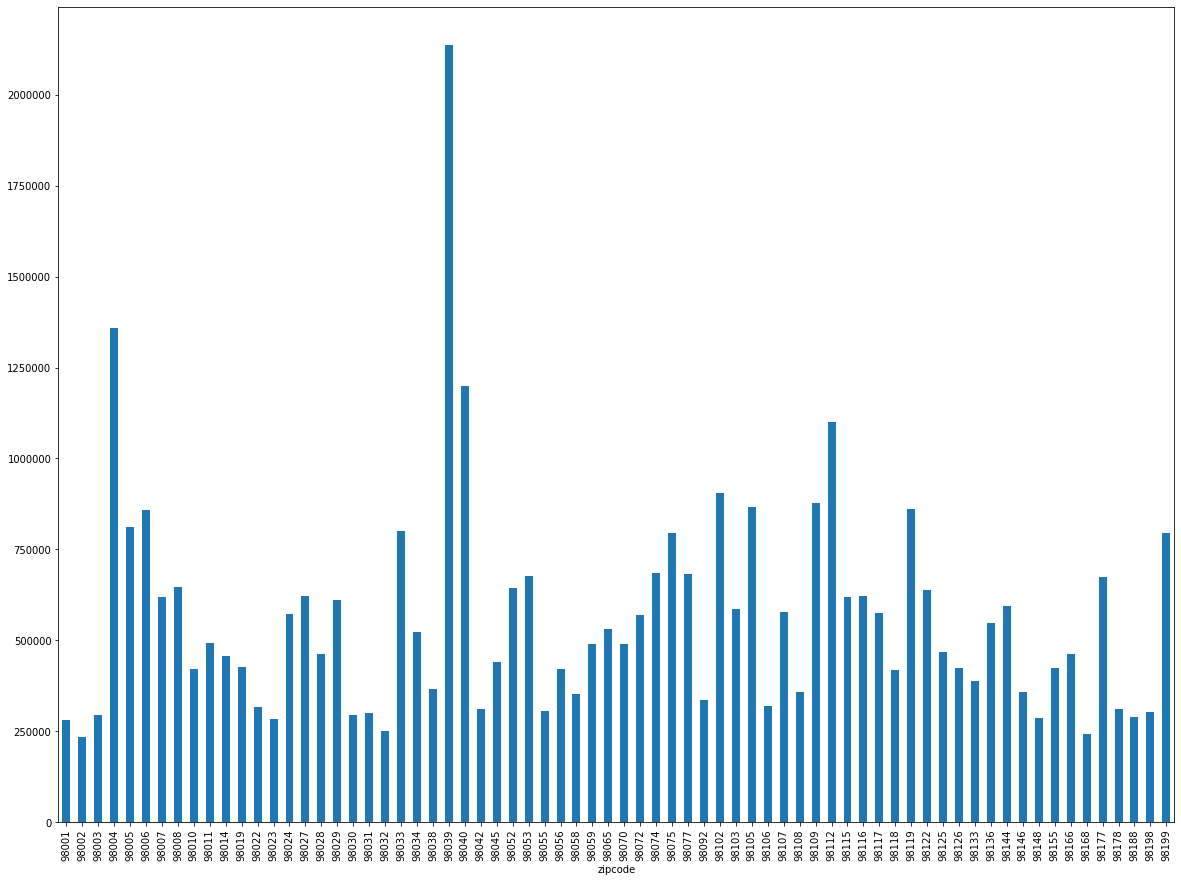

In [49]:
# Visualising the top 5 zip codes in terms of price
fig, ax = plt.subplots(figsize=(20,15))
df.groupby('zipcode')['price'].mean().plot.bar()

plt.savefig('images/barplot.png')
plt.show()

The top 5 zip codes by average price are 98039, 98004, 98040, 98112 and 98102. 

To visualize the most expensive areas of King county, longitude and latitude data used with a scatter plot. Here it can be observed that in general northern part of the city and the houses surrounding Lake Washington has higher prices. 

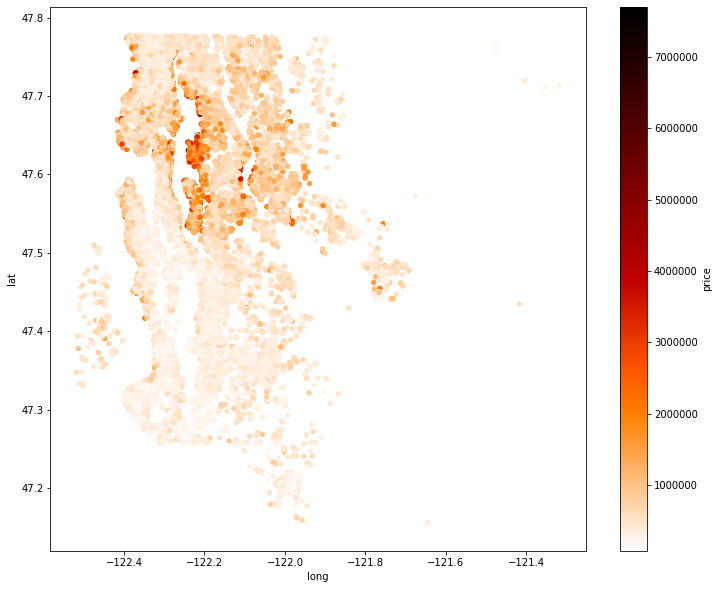

In [50]:
# Visualizing 'lat' and 'long' with a scatter plot
df.plot(kind="scatter", x="long", y="lat", figsize=(12, 10), c="price", 
             cmap="gist_heat_r", colorbar=True, sharex=False);
plt.show();

To further analyze location's effect on house prices an open source data 'zipcode_king_county.geojson' is loaded to work with folium. It is aimed to create a heatmap with `Choropleth()` function showing average price for each zip code.

In [104]:
import json
# Calculating each zipcodes price mean
df_geo = df.groupby('zipcode')[['price']].mean().reset_index()
# changing zipcode data type to string to make it compatible with geojson file
df_geo['zipcode'] = df_geo['zipcode'].astype(str)

# loading the data
king_county_geo = 'zipcode_king_county.geojson'
with open(king_county_geo, 'r') as j:
    geo_data = json.load(j)
    
# Filtering the zip codes that exists in our dataset 
geozips = []
for i in range(len(geo_data['features'])):
    if geo_data['features'][i]['properties']['ZCTA5CE10'] in list(df_geo['zipcode'].unique()):
        geozips.append(geo_data['features'][i])
        
# Creating a new geojson dictionary with the filtered zip codes
new_json = dict.fromkeys(['type','features'])
new_json['type'] = 'FeatureCollection'
new_json['features'] = geozips

# Write content of dictionary with filtered zip codes to a json file
with open("king_county_new_geodata.json", "w") as new_file:
    new_file.write(json.dumps(
        new_json,
        sort_keys=True,
        indent=4, separators=(',', ': '),
    )
                  )

In [52]:
# Import folium library for map 
import folium

# Defining a start point view of the map
king_county = 'king_county_new_geodata.json'
m = folium.Map(
    location=[47.36, -121.89],
    zoom_start=10,
    detect_retina=True,
    control_scale=False,
)

# Creating a Choropleth with the help of follium 
folium.Choropleth(
    geo_data=king_county_geo,
    name='choropleth',
    data=df_geo,
    columns=['zipcode', 'price'],
    key_on='feature.properties.ZCTA5CE10',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average price'
).add_to(m)
folium.LayerControl().add_to(m)

m

It can be concluded that the Bellevue, Seattle and Mercer Island have the highest average house prices. Let's see whether the top 5 zip codes will match with the most expensive areas.

In [53]:
# Cerating a list of zipcodes, latitude and longitude belongong to the zipcodes
zipcode_list = [[47.6172, -122.230, 98039], [47.6312, -122.223, 98040], [47.5316, -122.233, 98040], [47.6440, -122.319, 98102], [47.6362, -122.302, 98112]]

for z in zipcode_list:
    lat = z[0]
    long = z[1]
    name = z[2]
    marker = folium.Marker(location=[lat, long], popup=name)
    marker.add_to(m)
m

As recognized from the above maps Northwest and Northeast parts of the areas average house prices are higher from rest of the county. At this point grouping the latitude and longitude according to their cardinal directions to can prove the assumptions based on the maps. In order to create directions for each geographical data point, the 'lat' and  'long' are zipped together. Then, the list is used to iterate over the latitude and longitude with the help of a for loop. Later, the 'direction' column can be used as a predictive for the regression analysis.

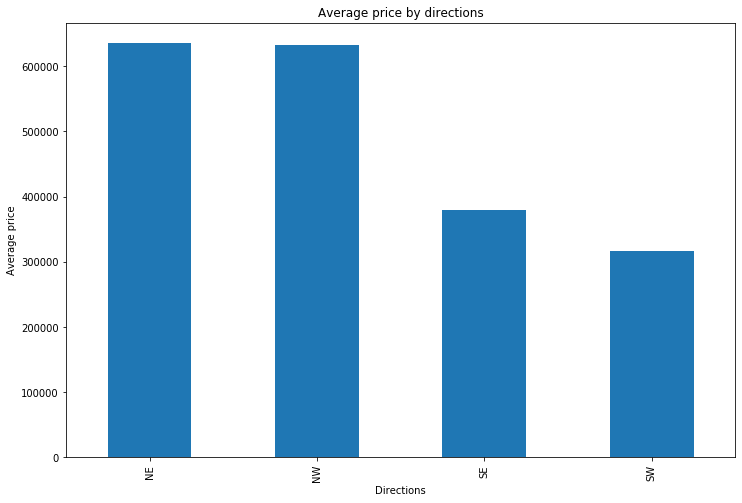

In [175]:
plt.figure(figsize=(12,8))
df.groupby('direction')['price'].mean().plot.bar()
plt.xlabel('Directions')
plt.ylabel('Average price')
plt.title('Average price by directions')
plt.show()

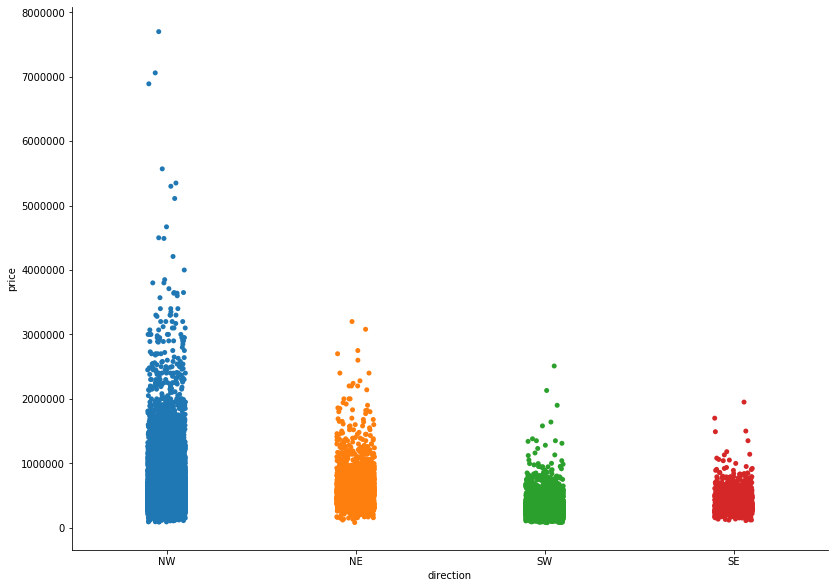

In [161]:
# Plotting the directions by price 
sns.catplot(x='direction', y='price', data=df, height=8.27, aspect=11.7/8.27);

Comments:
- As expected the northwest of the county has the highest price and highest variance. 
- Northeast is the second in terms of highest price and variance.
- Southwest and Southeast parts of the county has lowest prices. 
- The average price for northeast and northwest are almost the same. 
- The average price of southeast is higher than southwest.
- Direction may not be effective as zip codes as a predictor.  

### Q2: Which Season and Months Are Best to Buy A House?

The second question aims to answer which season and month is more affordable. In order to  answer our second question the 'month' and 'season' columns which are previously created and added to the dataframe are used. Furthermore, groupby() function is used to group data in months and seasons. With the help of mean() function mean for each season and month is reached. During grouping the price by months and seasons, the mean () function is used to reach unbiased results. 


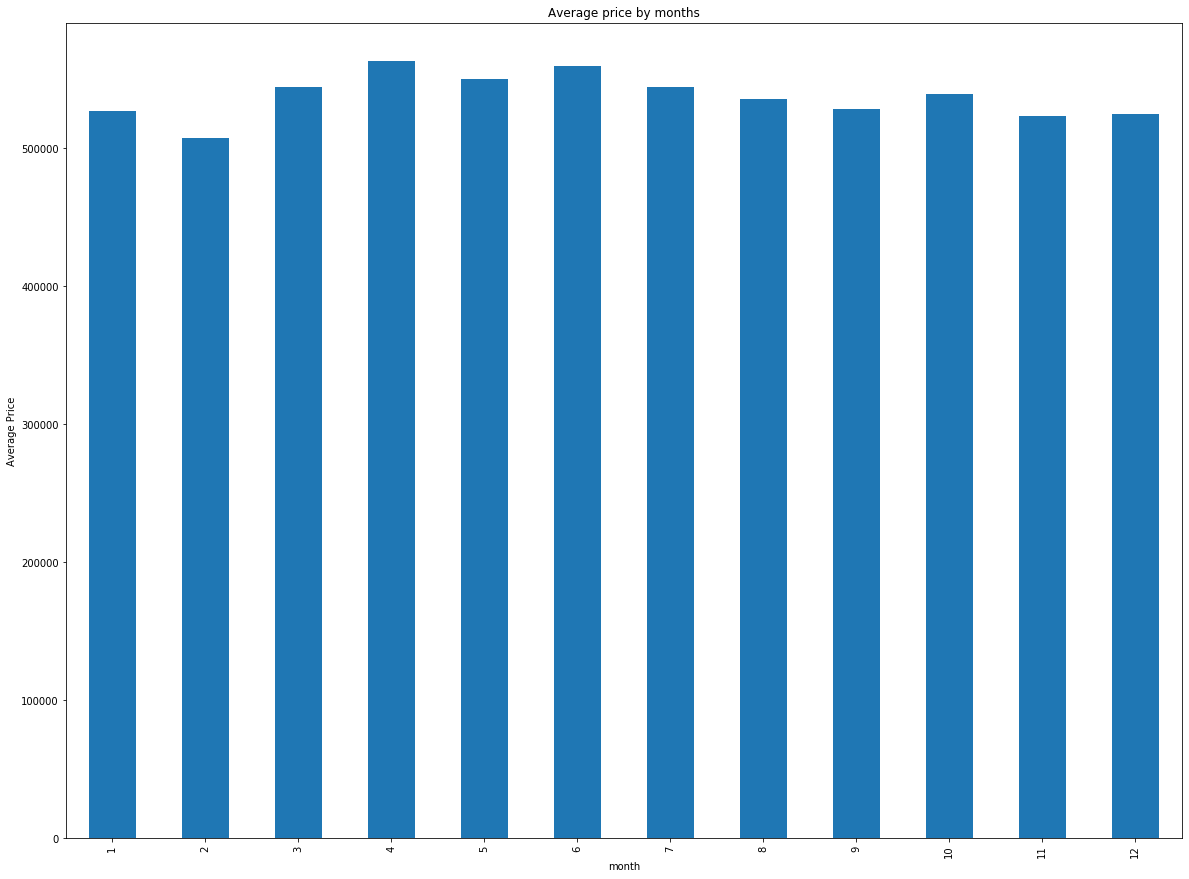

In [106]:
# Visualizing average price by months
fig, ax = plt.subplots(figsize=(20,15))
df.groupby('month')['price'].mean().plot.bar()
plt.title('Average price by months')
plt.ylabel('Average Price')
plt.show()

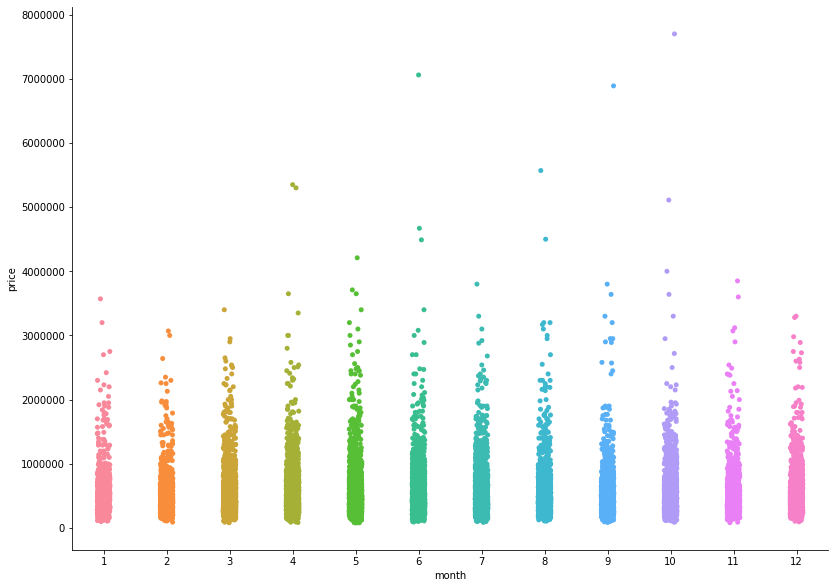

In [61]:
# Plotting the months by price 
sns.catplot(x='month', y='price', data=df, height=8.27, aspect=11.7/8.27);

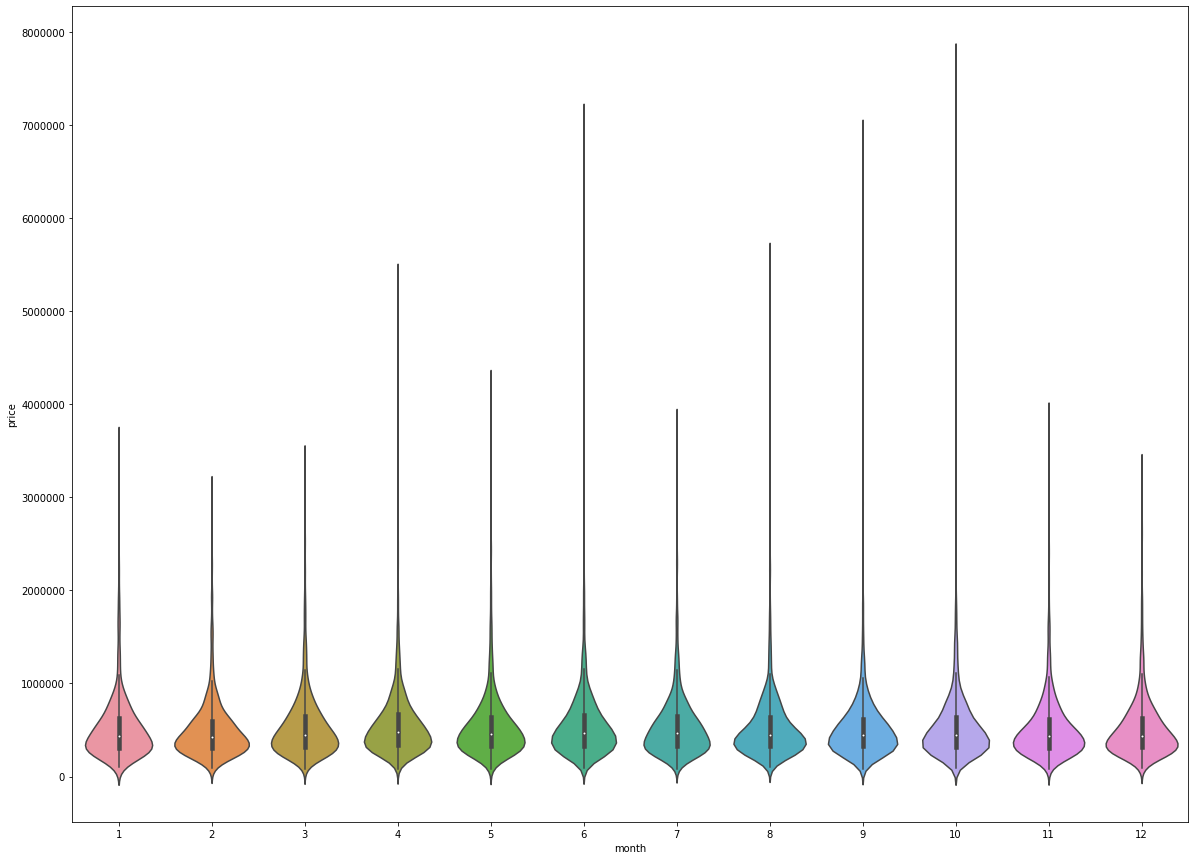

In [62]:
# Creating violin plots 
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.violinplot(x="month", y='price', data=df)

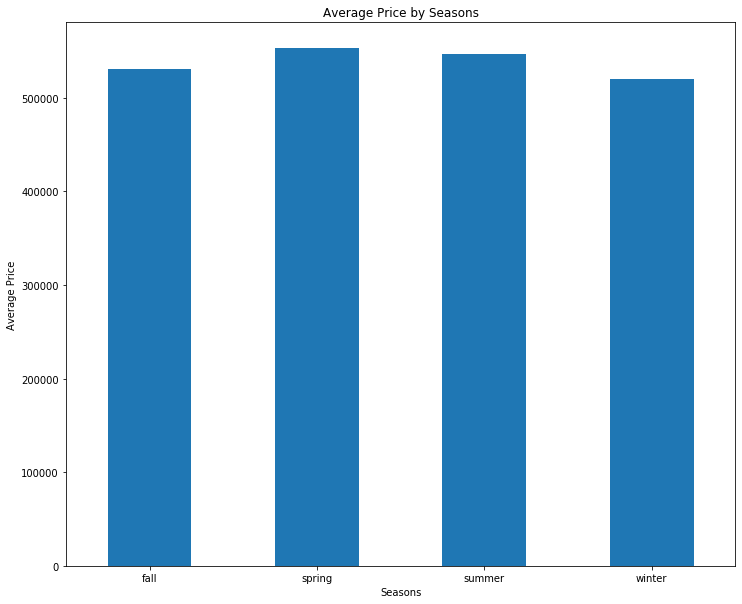

In [174]:
# Visualizing average price by seasons
fig, ax = plt.subplots(figsize=(12,10))
df.groupby('season')['price'].mean().plot.bar()
plt.xlabel('Seasons')
plt.ylabel('Average Price')

plt.title('Average Price by Seasons')
plt.show()

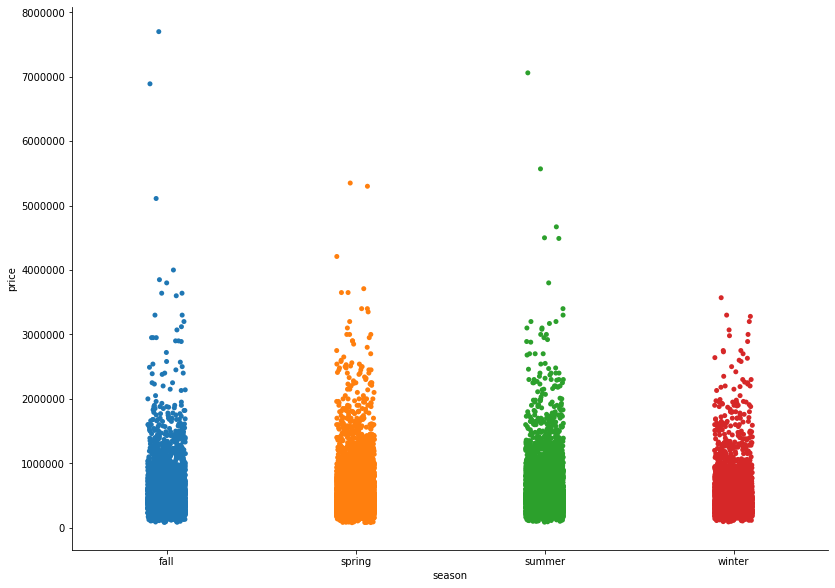

In [64]:
# Plotting the four seasons by price 
sns.catplot(x='season', y='price', data=df, height=8.27, aspect=11.7/8.27);

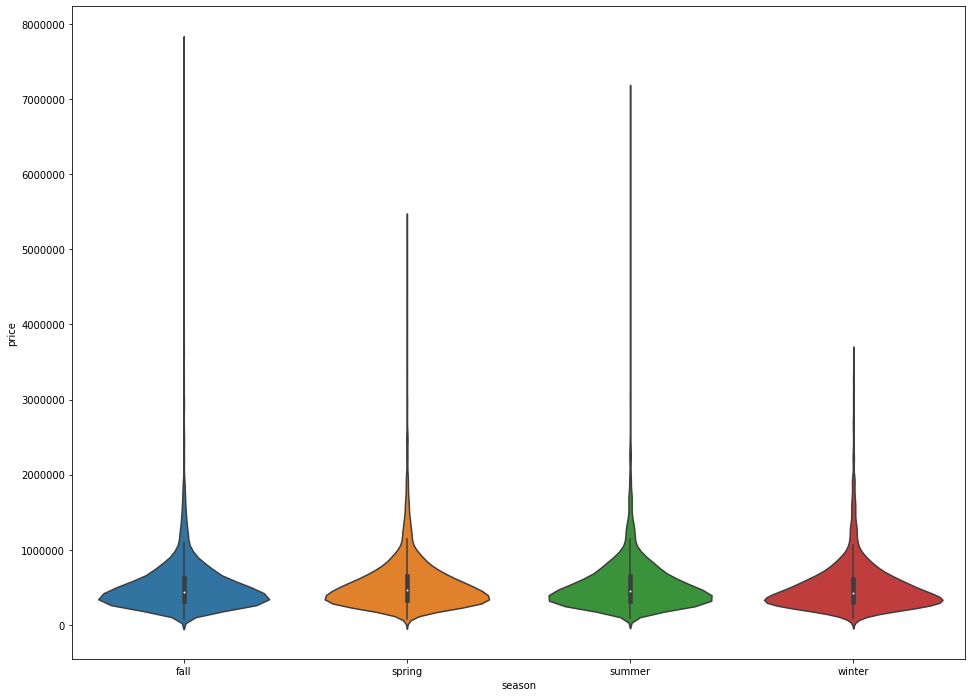

In [65]:
# Creating violin plots
fig, ax = plt.subplots(figsize=(16,12))
ax = sns.violinplot(x="season", y='price', data=df)

Comments:

- As predicted the best season to buy a house is winter.
- Fall has the highest price range followed by summer and spring.
- Spring has the highest average price followed by summer and fall.
- The average prices for each season are very close. The median values for each season are close, too. Season is not genuine as expected to be used as a predictor in the regression model.
- While October has the highest variance, February has the lowest variance.
- February has the lowest, April has the highest price average. 
- There isn't a the big difference between the median values and average price for months.
- Month is also not a good predictor for the regression model. 


## Modelling the Data

Until now, the data is cleaned and explored. New features are created and added to the dataframe. In addition, principles of Linear Regression; linearity, normality and multicollinearity are checked before fitting the model. Also, for skewed distributions log values are calculated. Another principle of Linear Regression, homoscedasticity will be explored after modeling our data. 

The first model will be baseline model, then the model will be refined according to the findings. 

In [66]:
# Importing the necessary libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import scipy.stats as stats

In [67]:
# Checking our columns begore getting started
df_final = pd.concat([df_cat, df_log], axis=1)
df_final.columns

Index(['vw_1', 'vw_2', 'vw_3', 'vw_4', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'floor_1', 'floor_1_5', 'floor_2',
       'floor_2_5', 'floor_3', 'fall', 'spring', 'summer', 'is_renovated',
       'waterfront', 'gr_3', 'gr_4', 'gr_5', 'gr_6', 'gr_7', 'gr_8', 'gr_9',
       'gr_10', 'gr_11', 'gr_12', 'with_basement', 'bedroom_1', 'bedroom_2',
       'bedroom_3', 'bedroom_4', 'bedroom_5', 'bedroom_6', 'bedroom_7',
       'bedroom_8', 'bedroom_9', 'bedroom_10', 'bedroom_11', 'price',
       'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15',
       'bathrooms', 'yr_built'],
      dtype='object')

Tough some columns interpreted as not good predictors like 'season' and 'condition', they will be included to baseline model to see their interaction with the target variable 'price'. 

The columns related to location will be added to our data to explore location's effect on predicting house prices. 

### Cerating a Baseline Model

In [68]:
# Creating the baseline model
from statsmodels.tools.tools import add_constant

outcome = 'price'
predictors = ['vw_1', 'vw_2', 'vw_3', 'vw_4', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'floor_1', 'floor_1_5', 'floor_2',
       'floor_2_5', 'floor_3', 'fall', 'spring', 'summer', 'is_renovated',
       'waterfront', 'gr_3', 'gr_4', 'gr_5', 'gr_6', 'gr_7', 'gr_8', 'gr_9',
       'gr_10', 'gr_11', 'gr_12', 'with_basement', 'bedroom_1', 'bedroom_2',
       'bedroom_3', 'bedroom_4', 'bedroom_5', 'bedroom_6', 'bedroom_7',
       'bedroom_8', 'bedroom_9', 'bedroom_10', 'sqft_living',
       'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'bathrooms',
       'yr_built']
        
X = sm.add_constant(df_final)
predictor_sum = '+'.join(predictors)
formula = outcome + '~' + predictor_sum
model = ols(formula=formula, data=X).fit()
model.summary()

/Users/esra/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     684.6
Date:                Sat, 21 Mar 2020   Prob (F-statistic):               0.00
Time:                        23:38:36   Log-Likelihood:                -3684.1
No. Observations:               18753   AIC:                             7460.
Df Residuals:                   18707   BIC:                             7821.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             83.3035      1.612     51.685      0.000      80.144      86.463
is_renovated[T.1]      0.0419      0.013      3.186      0.001       0.016       0.068
waterfront[T.1.0]      0.3425      0.051      6.721      0.000       0.243       0.442
with_basement[T.1]     0.0918      0.009      9.697      0.000       0.073       0.110
vw_1                   0.1204      0.018      6.710      0.000       0.085       0.156
vw_2                   0.0727      0.011      6.463      0.000       0.051       0.095
vw_3                   0.1069      0.016      6.551      0.000       0.075       0.139
vw_4                   0.2025      0.027      7.564      0.000       0.150       0.255
condition_2            0.0383      0.067      0.573      0.567      -0.093       0.169
condition_3            0.1857      0.062      2.991      0.003       0.064       0.307
condition_4            0.2212      0.062      3.562      0.000       0.099       0.343
condition_5            0.2899      0.062      4.642      0.000       0.167       0.412
floor_1               -0.1301      0.121     -1.075      0.283      -0.368       0.107
floor_1_5             -0.1316      0.121     -1.086      0.278      -0.369       0.106
floor_2               -0.1421      0.121     -1.177      0.239      -0.379       0.095
floor_2_5             -0.1257      0.124     -1.016      0.310      -0.368       0.117
floor_3               -0.0093      0.121     -0.077      0.939      -0.247       0.228
fall                   0.0026      0.007      0.387      0.699      -0.011       0.016
spring                 0.0510      0.007      7.837      0.000       0.038       0.064
summer                 0.0160      0.007      2.444      0.015       0.003       0.029
gr_3                   8.0747      0.313     25.785      0.000       7.461       8.688
gr_4                   7.7036      0.174     44.369      0.000       7.363       8.044
gr_5                   7.7582      0.163     47.527      0.000       7.438       8.078
gr_6                   7.9594      0.163     48.784      0.000       7.640       8.279
gr_7                   8.1674      0.164     49.754      0.000       7.846       8.489
gr_8                   8.3573      0.165     50.725      0.000       8.034       8.680
gr_9                   8.6032      0.165     52.073      0.000       8.279       8.927
gr_10                  8.7666      0.165     52.993      0.000       8.442       9.091
gr_11                  8.8948      0.167     53.390      0.000       8.568       9.221
gr_12                  9.0184      0.194     46.531      0.000       8.639       9.398
bedroom_1              0.3258      0.296      1.099      0.272      -0.255       0.907
bedroom_2              0.3247      0.295      1.099      0.272      -0.254       0.904
bedroom_3              0.2451      0.2

Comments:

- There are a number of p-values higher than the confident interval 0.005. They should be dropped. Floors, bedrooms, condition_2 and fall exists in this group. 
- Surprisingly, 'yr_built' column has the highest effect on house prices in a negative way. This means that older houses have higher prices. 
- Besides, grade is a good predictive and has the positive highest coefficients. 
- Sqft_living, bathrooms, sqft_living15, waterfront and view columns coefficient are also important in terms of predicting. 


In [69]:
# Filtering p-values higher than 0.05
p_values = ols(formula=formula, data=df_final).fit().pvalues
selected_cols = [x for x in p_values[p_values < 0.05].index.tolist() if not x == 'Intercept']
selected_cols = [x.replace('[T.1]', '').replace('[T.1.0]', '') for x in selected_cols]
selected_cols

['is_renovated',
 'waterfront',
 'with_basement',
 'vw_1',
 'vw_2',
 'vw_3',
 'vw_4',
 'condition_3',
 'condition_4',
 'condition_5',
 'spring',
 'summer',
 'gr_3',
 'gr_4',
 'gr_5',
 'gr_6',
 'gr_7',
 'gr_8',
 'gr_9',
 'gr_10',
 'gr_11',
 'gr_12',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_living15',
 'sqft_lot15',
 'bathrooms',
 'yr_built']

In [70]:
#  After removing high p-values
outcome = 'price'
predictors = selected_cols       
X = sm.add_constant(df_final)
predictor_sum = '+'.join(predictors)
formula = outcome + '~' + predictor_sum
model = ols(formula=formula, data=X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     1081.
Date:                Sat, 21 Mar 2020   Prob (F-statistic):               0.00
Time:                        23:38:36   Log-Likelihood:                -3794.0
No. Observations:               18753   AIC:                             7646.
Df Residuals:                   18724   BIC:                             7873.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             83.4089      1.432     58.238      0.000      80.602      86.216
is_renovated[T.1]      0.0437      0.013      3.324      0.001       0.018       0.070
waterfront[T.1.0]      0.3607      0.051      7.051      0.000       0.260       0.461
with_basement[T.1]     0.0845      0.009      8.959      0.000       0.066       0.103
vw_1                   0.1308      0.018      7.263      0.000       0.095       0.166
vw_2                   0.0810      0.011      7.174      0.000       0.059       0.103
vw_3                   0.1190      0.016      7.268      0.000       0.087       0.151
vw_4                   0.2217      0.027      8.254      0.000       0.169       0.274
condition_3            0.1506      0.024      6.180      0.000       0.103       0.198
condition_4            0.1860      0.024      7.603      0.000       0.138       0.234
condition_5            0.2524      0.025      9.957      0.000       0.203       0.302
spring                 0.0488      0.005      9.375      0.000       0.039       0.059
summer                 0.0144      0.005      2.734      0.006       0.004       0.025
gr_3                   8.0909      0.305     26.532      0.000       7.493       8.689
gr_4                   7.7094      0.157     49.164      0.000       7.402       8.017
gr_5                   7.7594      0.145     53.374      0.000       7.474       8.044
gr_6                   7.9551      0.145     54.776      0.000       7.670       8.240
gr_7                   8.1570      0.146     55.721      0.000       7.870       8.444
gr_8                   8.3583      0.147     56.768      0.000       8.070       8.647
gr_9                   8.6094      0.148     58.217      0.000       8.320       8.899
gr_10                  8.7856      0.148     59.273      0.000       8.495       9.076
gr_11                  8.9278      0.149     59.727      0.000       8.635       9.221
gr_12                  9.0559      0.180     50.405      0.000       8.704       9.408
sqft_living            0.1843      0.022      8.356      0.000       0.141       0.227
sqft_lot              -0.0779      0.009     -9.132      0.000      -0.095      -0.061
sqft_above             0.1345      0.021      6.268      0.000       0.092       0.177
sqft_living15          0.3043      0.012     26.449      0.000       0.282       0.327
sqft_lot15            -0.0891      0.009     -9.582      0.000      -0.107      -0.071
bathrooms              0.1096      0.016      6.900      0.000       0.078       0.141
yr_built             -10.8387      0.208    -52.229      0.000     -11.245     -10.432
==============================================================================
Omnibus:                       59.354   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (J

A slight decrease in r_squared value is observed after eliminating high p-values. 

In [71]:
# Splitting the data for train and test
from sklearn.model_selection import train_test_split

data = df_final[selected_cols]
x = df_final.drop('price', axis=1)
y = df_final[['price']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
print(len(x_train), len(x_test), len(y_train), len(y_test))

14064 4689 14064 4689


In [72]:
# Fitting the model
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
# Predicting for train and test data 
y_hat_train = linreg.predict(x_train)
y_hat_test = linreg.predict(x_test)

# Calculating the residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

from sklearn.metrics import mean_squared_error

# calculating mean Squared error and root mean squared error for train and test data
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

print('Train Root Mean Squarred Error:', np.sqrt(train_mse))
print('Test Root Mean Squarred Error:', np.sqrt(test_mse))

Train Mean Squarred Error: 0.0875422864145719
Test Mean Squarred Error: 0.08458940617513233
Train Root Mean Squarred Error: 0.29587545760771017
Test Root Mean Squarred Error: 0.2908425797147528


The mean squared error and root mean squared error for train and test data indicates that the model is not underfitting or overfitting.

### Refining the Model

The zip codes and directions will be added to the dataframe to increase the r squared value of our model. First, dummy variables for directions and zip codes will be added to our data.

In [74]:
# Creating dummy variables for zip codes and directions
df_cleaned_zipcode_dummy = pd.get_dummies(df_cleaned['zipcode'], prefix = 'zip', drop_first=True)

In [75]:
# Merging the zipcode dummy and direction dummy 
df_final2 = pd.concat([df_final, df_cleaned_zipcode_dummy, df_cleaned_direction_dummy], axis = 1)
list(df_final2.columns)

['vw_1',
 'vw_2',
 'vw_3',
 'vw_4',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'floor_1',
 'floor_1_5',
 'floor_2',
 'floor_2_5',
 'floor_3',
 'fall',
 'spring',
 'summer',
 'is_renovated',
 'waterfront',
 'gr_3',
 'gr_4',
 'gr_5',
 'gr_6',
 'gr_7',
 'gr_8',
 'gr_9',
 'gr_10',
 'gr_11',
 'gr_12',
 'with_basement',
 'bedroom_1',
 'bedroom_2',
 'bedroom_3',
 'bedroom_4',
 'bedroom_5',
 'bedroom_6',
 'bedroom_7',
 'bedroom_8',
 'bedroom_9',
 'bedroom_10',
 'bedroom_11',
 'price',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_living15',
 'sqft_lot15',
 'bathrooms',
 'yr_built',
 'zip_98002',
 'zip_98003',
 'zip_98004',
 'zip_98005',
 'zip_98006',
 'zip_98007',
 'zip_98008',
 'zip_98010',
 'zip_98011',
 'zip_98014',
 'zip_98019',
 'zip_98022',
 'zip_98023',
 'zip_98024',
 'zip_98027',
 'zip_98028',
 'zip_98029',
 'zip_98030',
 'zip_98031',
 'zip_98032',
 'zip_98033',
 'zip_98034',
 'zip_98038',
 'zip_98039',
 'zip_98040',
 'zip_98042',
 'zip_98045',
 'zip_98052',


In [76]:
# Fitting the second model
outcome = 'price'
predictors = [
 'vw_1',
 'vw_2',
 'vw_3',
 'vw_4',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'floor_1',
 'floor_1_5',
 'floor_2',
 'floor_2_5',
 'floor_3',
 'fall',
 'spring',
 'summer',
 'is_renovated',
 'waterfront',
 'gr_3',
 'gr_4',
 'gr_5',
 'gr_6',
 'gr_7',
 'gr_8',
 'gr_9',
 'gr_10',
 'gr_11',
 'gr_12',
 'with_basement',
 'bedroom_1',
 'bedroom_2',
 'bedroom_3',
 'bedroom_4',
 'bedroom_5',
 'bedroom_6',
 'bedroom_7',
 'bedroom_8',
 'bedroom_9',
 'bedroom_10',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_living15',
 'sqft_lot15',
 'bathrooms',
 'yr_built',
 'zip_98002',
 'zip_98003',
 'zip_98004',
 'zip_98005',
 'zip_98006',
 'zip_98007',
 'zip_98008',
 'zip_98010',
 'zip_98011',
 'zip_98014',
 'zip_98019',
 'zip_98022',
 'zip_98023',
 'zip_98024',
 'zip_98027',
 'zip_98028',
 'zip_98029',
 'zip_98030',
 'zip_98031',
 'zip_98032',
 'zip_98033',
 'zip_98034',
 'zip_98038',
 'zip_98039',
 'zip_98040',
 'zip_98042',
 'zip_98045',
 'zip_98052',
 'zip_98053',
 'zip_98055',
 'zip_98056',
 'zip_98058',
 'zip_98059',
 'zip_98065',
 'zip_98070',
 'zip_98072',
 'zip_98074',
 'zip_98075',
 'zip_98077',
 'zip_98092',
 'zip_98102',
 'zip_98103',
 'zip_98105',
 'zip_98106',
 'zip_98107',
 'zip_98108',
 'zip_98109',
 'zip_98112',
 'zip_98115',
 'zip_98116',
 'zip_98117',
 'zip_98118',
 'zip_98119',
 'zip_98122',
 'zip_98125',
 'zip_98126',
 'zip_98133',
 'zip_98136',
 'zip_98144',
 'zip_98146',
 'zip_98148',
 'zip_98155',
 'zip_98166',
 'zip_98168',
 'zip_98177',
 'zip_98178',
 'zip_98188',
 'zip_98198',
 'zip_98199',
 'NE',
 'NW',
 'SW'
]

X2 = sm.add_constant(df_final2)
predictor_sum = '+'.join(predictors)
formula = outcome + '~' + predictor_sum 
model = ols(formula=formula, data=X2).fit()
model.summary()

/Users/esra/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     1125.
Date:                Sat, 21 Mar 2020   Prob (F-statistic):               0.00
Time:                        23:38:37   Log-Likelihood:                 6757.5
No. Observations:               18753   AIC:                        -1.328e+04
Df Residuals:                   18635   BIC:                        -1.235e+04
Df Model:                         117                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              9.3915      1.142      8.226      0.000       7.154      11.629
is_renovated[T.1]      0.0720      0.008      9.457      0.000       0.057       0.087
waterfront[T.1.0]      0.4617      0.029     15.653      0.000       0.404       0.519
with_basement[T.1]     0.0296      0.006      5.355      0.000       0.019       0.040
vw_1                   0.0982      0.010      9.409      0.000       0.078       0.119
vw_2                   0.1015      0.007     15.442      0.000       0.089       0.114
vw_3                   0.1828      0.010     19.227      0.000       0.164       0.201
vw_4                   0.2616      0.016     16.824      0.000       0.231       0.292
condition_2            0.1730      0.039      4.493      0.000       0.098       0.249
condition_3            0.3045      0.036      8.515      0.000       0.234       0.375
condition_4            0.3460      0.036      9.669      0.000       0.276       0.416
condition_5            0.4137      0.036     11.495      0.000       0.343       0.484
floor_1                0.0586      0.070      0.840      0.401      -0.078       0.195
floor_1_5              0.0646      0.070      0.925      0.355      -0.072       0.201
floor_2                0.0556      0.069      0.799      0.424      -0.081       0.192
floor_2_5              0.0398      0.071      0.559      0.576      -0.100       0.179
floor_3               -0.0075      0.070     -0.108      0.914      -0.144       0.129
fall                  -0.0164      0.004     -4.173      0.000      -0.024      -0.009
spring                 0.0370      0.004      9.863      0.000       0.030       0.044
summer                -0.0072      0.004     -1.905      0.057      -0.015       0.000
gr_3                   1.2524      0.191      6.549      0.000       0.878       1.627
gr_4                   0.6526      0.119      5.493      0.000       0.420       0.885
gr_5                   0.6482      0.114      5.677      0.000       0.424       0.872
gr_6                   0.7277      0.115      6.345      0.000       0.503       0.952
gr_7                   0.7936      0.116      6.865      0.000       0.567       1.020
gr_8                   0.8769      0.116      7.546      0.000       0.649       1.105
gr_9                   0.9930      0.117      8.500      0.000       0.764       1.222
gr_10                  1.0578      0.117      9.026      0.000       0.828       1.288
gr_11                  1.1436      0.118      9.698      0.000       0.912       1.375
gr_12                  1.2458      0.131      9.515      0.000       0.989       1.502
bedroom_1             -0.0733      0.170     -0.430      0.667      -0.407       0.261
bedroom_2             -0.0816      0.170     -0.480      0.631      -0.415       0.251
bedroom_3             -0.1000      0.1

In [77]:
# removing the high p-values
p_values = ols(formula=formula, data=df_final2).fit().pvalues
selected_cols2 = [x for x in p_values[p_values < 0.05].index.tolist() if not x == 'Intercept']
selected_cols2 = [x.replace('[T.1]', '').replace('[T.1.0]', '') for x in selected_cols2]
selected_cols2

['is_renovated',
 'waterfront',
 'with_basement',
 'vw_1',
 'vw_2',
 'vw_3',
 'vw_4',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'fall',
 'spring',
 'gr_3',
 'gr_4',
 'gr_5',
 'gr_6',
 'gr_7',
 'gr_8',
 'gr_9',
 'gr_10',
 'gr_11',
 'gr_12',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_living15',
 'bathrooms',
 'yr_built',
 'zip_98003',
 'zip_98004',
 'zip_98005',
 'zip_98006',
 'zip_98007',
 'zip_98008',
 'zip_98010',
 'zip_98011',
 'zip_98014',
 'zip_98019',
 'zip_98024',
 'zip_98027',
 'zip_98028',
 'zip_98029',
 'zip_98030',
 'zip_98031',
 'zip_98033',
 'zip_98034',
 'zip_98038',
 'zip_98039',
 'zip_98040',
 'zip_98042',
 'zip_98045',
 'zip_98052',
 'zip_98053',
 'zip_98055',
 'zip_98056',
 'zip_98058',
 'zip_98059',
 'zip_98065',
 'zip_98070',
 'zip_98072',
 'zip_98074',
 'zip_98075',
 'zip_98077',
 'zip_98102',
 'zip_98103',
 'zip_98105',
 'zip_98106',
 'zip_98107',
 'zip_98108',
 'zip_98109',
 'zip_98112',
 'zip_98115',
 'zip_98116',
 'zip_98117',
 'zi

In [78]:
# Fitting again after removing the higher p-values

outcome = 'price'
predictors = selected_cols2

X2 = sm.add_constant(df_final2)

predictor_sum = '+'.join(predictors)
formula = outcome + '~' + predictor_sum 
model = ols(formula=formula, data=X2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1390.
Date:                Sat, 21 Mar 2020   Prob (F-statistic):               0.00
Time:                        23:38:38   Log-Likelihood:                 6689.8
No. Observations:               18753   AIC:                        -1.319e+04
Df Residuals:                   18658   BIC:                        -1.244e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             11.0373      1.043     10.584      0.000       8.993      13.081
is_renovated[T.1]      0.0728      0.008      9.597      0.000       0.058       0.088
waterfront[T.1.0]      0.4633      0.030     15.688      0.000       0.405       0.521
with_basement[T.1]     0.0341      0.005      6.218      0.000       0.023       0.045
vw_1                   0.0978      0.010      9.359      0.000       0.077       0.118
vw_2                   0.1009      0.007     15.346      0.000       0.088       0.114
vw_3                   0.1827      0.010     19.219      0.000       0.164       0.201
vw_4                   0.2583      0.016     16.593      0.000       0.228       0.289
condition_2            0.1713      0.039      4.435      0.000       0.096       0.247
condition_3            0.3037      0.036      8.472      0.000       0.233       0.374
condition_4            0.3445      0.036      9.604      0.000       0.274       0.415
condition_5            0.4141      0.036     11.481      0.000       0.343       0.485
fall                  -0.0117      0.003     -3.706      0.000      -0.018      -0.006
spring                 0.0415      0.003     14.271      0.000       0.036       0.047
gr_3                   1.4398      0.185      7.765      0.000       1.076       1.803
gr_4                   0.8113      0.109      7.425      0.000       0.597       1.025
gr_5                   0.8084      0.104      7.759      0.000       0.604       1.013
gr_6                   0.8879      0.105      8.480      0.000       0.683       1.093
gr_7                   0.9536      0.106      9.026      0.000       0.747       1.161
gr_8                   1.0367      0.106      9.742      0.000       0.828       1.245
gr_9                   1.1559      0.107     10.789      0.000       0.946       1.366
gr_10                  1.2220      0.108     11.357      0.000       1.011       1.433
gr_11                  1.3054      0.108     12.043      0.000       1.093       1.518
gr_12                  1.4164      0.122     11.565      0.000       1.176       1.657
sqft_living            0.2216      0.013     17.408      0.000       0.197       0.247
sqft_lot               0.0587      0.003     18.375      0.000       0.052       0.065
sqft_above             0.1835      0.012     14.818      0.000       0.159       0.208
sqft_living15          0.1573      0.007     22.715      0.000       0.144       0.171
bathrooms              0.0735      0.009      8.025      0.000       0.056       0.091
yr_built              -0.6188      0.149     -4.149      0.000      -0.911      -0.327
zip_98003              0.0321      0.011      2.815      0.005       0.010       0.055
zip_98004              0.9844      0.015     64.030      0.000       0.954       1.015
zip_98005              0.6550      0.0

In [79]:
# Splitting the data for train and test
data = df_final2
x = df_final2[selected_cols2]
y = df_final2[['price']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(len(x_train), len(x_test), len(y_train), len(y_test))

15002 3751 15002 3751


In [80]:
# fitting the model for test and train sets
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
# Predicting for train and test data 
y_hat_train = linreg.predict(x_train)
y_hat_test = linreg.predict(x_test)

# Calculating the residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

from sklearn.metrics import mean_squared_error

# calculating mean Squared error and root mean squared error for train and test data
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)


print('Train Root Mean Squared Error:', np.sqrt(train_mse))
print('Test Root Mean Squared Error:', np.sqrt(test_mse))

Train Mean Squared Error: 0.028552554029325203
Test Mean Squared Error: 0.029620582635837063
Train Root Mean Squared Error: 0.16897501007345792
Test Root Mean Squared Error: 0.1721063120162566


After refitting the second model the r-squared value reaches 0.875 and 0.874. The test and train mean squared errors and root mean squared errors indicates that the last model is not overfitting or underfitting. 

### Dealing with Multicollinearity

Among the remaining continuous data types there is high correlation between 'sqft_living' and 'sqft_above'. Since the coefficient of sqft_living is higher, 'sqft_above' will be dropped. 

In [82]:
df_final2[[ 'sqft_living','sqft_lot','sqft_above','sqft_living15','bathrooms','yr_built']].corr() > 0.75

sqft_living  sqft_lot  sqft_above  sqft_living15  bathrooms  \
sqft_living           True     False        True          False      False   
sqft_lot             False      True       False          False      False   
sqft_above            True     False        True          False      False   
sqft_living15        False     False       False           True      False   
bathrooms            False     False       False          False       True   
yr_built             False     False       False          False      False   

               yr_built  
sqft_living       False  
sqft_lot          False  
sqft_above        False  
sqft_living15     False  
bathrooms         False  
yr_built           True

In [83]:
# Dropping correlated feature
df_final2.drop(columns='sqft_above', inplace=True)

In [84]:
# Cheking for multicollinearity again
df_final2[['sqft_living','sqft_lot','sqft_living15','bathrooms','yr_built']].corr() > 0.75

sqft_living  sqft_lot  sqft_living15  bathrooms  yr_built
sqft_living           True     False          False      False     False
sqft_lot             False      True          False      False     False
sqft_living15        False     False           True      False     False
bathrooms            False     False          False       True     False
yr_built             False     False          False      False      True

In [85]:
outcome = 'price'
predictors = ['is_renovated',
 'waterfront',
 'with_basement',
 'vw_1',
 'vw_2',
 'vw_3',
 'vw_4',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'fall',
 'spring',
 'gr_3',
 'gr_4',
 'gr_5',
 'gr_6',
 'gr_7',
 'gr_8',
 'gr_9',
 'gr_10',
 'gr_11',
 'gr_12',
 'sqft_living',
 'sqft_lot',
 'sqft_living15',
 'bathrooms',
 'yr_built',
 'zip_98003',
 'zip_98004',
 'zip_98005',
 'zip_98006',
 'zip_98007',
 'zip_98008',
 'zip_98010',
 'zip_98011',
 'zip_98014',
 'zip_98019',
 'zip_98024',
 'zip_98027',
 'zip_98028',
 'zip_98029',
 'zip_98030',
 'zip_98031',
 'zip_98033',
 'zip_98034',
 'zip_98038',
 'zip_98039',
 'zip_98040',
 'zip_98042',
 'zip_98045',
 'zip_98052',
 'zip_98053',
 'zip_98055',
 'zip_98056',
 'zip_98058',
 'zip_98059',
 'zip_98065',
 'zip_98070',
 'zip_98072',
 'zip_98074',
 'zip_98075',
 'zip_98077',
 'zip_98102',
 'zip_98103',
 'zip_98105',
 'zip_98106',
 'zip_98107',
 'zip_98108',
 'zip_98109',
 'zip_98112',
 'zip_98115',
 'zip_98116',
 'zip_98117',
 'zip_98118',
 'zip_98119',
 'zip_98122',
 'zip_98125',
 'zip_98126',
 'zip_98133',
 'zip_98136',
 'zip_98144',
 'zip_98146',
 'zip_98148',
 'zip_98155',
 'zip_98166',
 'zip_98168',
 'zip_98177',
 'zip_98178',
 'zip_98188',
 'zip_98198',
 'zip_98199',
 'NE',
 'NW']

X2 = sm.add_constant(df_final2)

predictor_sum = '+'.join(predictors)
formula = outcome + '~' + predictor_sum 
model_final = ols(formula=formula, data=X2).fit()
model_final.summary()

/Users/esra/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     1386.
Date:                Sat, 21 Mar 2020   Prob (F-statistic):               0.00
Time:                        23:38:39   Log-Likelihood:                 6580.1
No. Observations:               18753   AIC:                        -1.297e+04
Df Residuals:                   18659   BIC:                        -1.224e+04
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.9116      1.049     10.403      0.000       8.856      12.968
is_renovated[T.1]      0.0722      0.008      9.454      0.000       0.057       0.087
waterfront[T.1.0]      0.4635      0.030     15.605      0.000       0.405       0.522
with_basement[T.1]    -0.0339      0.003    -11.256      0.000      -0.040      -0.028
vw_1                   0.0973      0.011      9.257      0.000       0.077       0.118
vw_2                   0.0997      0.007     15.068      0.000       0.087       0.113
vw_3                   0.1791      0.010     18.737      0.000       0.160       0.198
vw_4                   0.2559      0.016     16.345      0.000       0.225       0.287
condition_2            0.1754      0.039      4.516      0.000       0.099       0.252
condition_3            0.3043      0.036      8.439      0.000       0.234       0.375
condition_4            0.3419      0.036      9.476      0.000       0.271       0.413
condition_5            0.4075      0.036     11.234      0.000       0.336       0.479
fall                  -0.0114      0.003     -3.589      0.000      -0.018      -0.005
spring                 0.0411      0.003     14.031      0.000       0.035       0.047
gr_3                   1.4108      0.186      7.565      0.000       1.045       1.776
gr_4                   0.7768      0.110      7.069      0.000       0.561       0.992
gr_5                   0.7826      0.105      7.469      0.000       0.577       0.988
gr_6                   0.8666      0.105      8.230      0.000       0.660       1.073
gr_7                   0.9355      0.106      8.804      0.000       0.727       1.144
gr_8                   1.0252      0.107      9.579      0.000       0.815       1.235
gr_9                   1.1506      0.108     10.677      0.000       0.939       1.362
gr_10                  1.2227      0.108     11.297      0.000       1.011       1.435
gr_11                  1.3105      0.109     12.019      0.000       1.097       1.524
gr_12                  1.4302      0.123     11.610      0.000       1.189       1.672
sqft_living            0.3829      0.007     57.637      0.000       0.370       0.396
sqft_lot               0.0562      0.003     17.529      0.000       0.050       0.063
sqft_living15          0.1614      0.007     23.184      0.000       0.148       0.175
bathrooms              0.0792      0.009      8.607      0.000       0.061       0.097
yr_built              -0.5804      0.150     -3.870      0.000      -0.874      -0.286
zip_98003              0.0312      0.011      2.718      0.007       0.009       0.054
zip_98004              0.9845      0.015     63.665      0.000       0.954       1.015
zip_98005              0.6540      0.019     35.319      0.000       0.618       0.690
zip_98006              0.5440      0.0

In [86]:
data = df_final2
x_f = df_final2[['is_renovated',
 'waterfront',
 'with_basement',
 'vw_1',
 'vw_2',
 'vw_3',
 'vw_4',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'fall',
 'spring',
 'gr_3',
 'gr_4',
 'gr_5',
 'gr_6',
 'gr_7',
 'gr_8',
 'gr_9',
 'gr_10',
 'gr_11',
 'gr_12',
 'sqft_living',
 'sqft_lot',
 'sqft_living15',
 'bathrooms',
 'yr_built',
 'zip_98003',
 'zip_98004',
 'zip_98005',
 'zip_98006',
 'zip_98007',
 'zip_98008',
 'zip_98010',
 'zip_98011',
 'zip_98014',
 'zip_98019',
 'zip_98024',
 'zip_98027',
 'zip_98028',
 'zip_98029',
 'zip_98030',
 'zip_98031',
 'zip_98033',
 'zip_98034',
 'zip_98038',
 'zip_98039',
 'zip_98040',
 'zip_98042',
 'zip_98045',
 'zip_98052',
 'zip_98053',
 'zip_98055',
 'zip_98056',
 'zip_98058',
 'zip_98059',
 'zip_98065',
 'zip_98070',
 'zip_98072',
 'zip_98074',
 'zip_98075',
 'zip_98077',
 'zip_98102',
 'zip_98103',
 'zip_98105',
 'zip_98106',
 'zip_98107',
 'zip_98108',
 'zip_98109',
 'zip_98112',
 'zip_98115',
 'zip_98116',
 'zip_98117',
 'zip_98118',
 'zip_98119',
 'zip_98122',
 'zip_98125',
 'zip_98126',
 'zip_98133',
 'zip_98136',
 'zip_98144',
 'zip_98146',
 'zip_98148',
 'zip_98155',
 'zip_98166',
 'zip_98168',
 'zip_98177',
 'zip_98178',
 'zip_98188',
 'zip_98198',
 'zip_98199',
 'NE',
 'NW']]

y = df_final2[['price']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(len(x_train), len(x_test), len(y_train), len(y_test))

15002 3751 15002 3751


In [87]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
# Predicting for train and test data 
y_hat_train = linreg.predict(x_train)
y_hat_test = linreg.predict(x_test)

# Calculating the residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

from sklearn.metrics import mean_squared_error

# calculating mean Squared error and root mean squared error for train and test data
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)
print('Train Root Mean Squared Error:', np.sqrt(train_mse))
print('Test Root Mean Squared Error:', np.sqrt(test_mse))


Train Mean Squared Error: 0.029231708728657116
Test Mean Squared Error: 0.026975501548334377
Train Root Mean Squared Error: 0.17097283038148814
Test Root Mean Squared Error: 0.16424220391949926


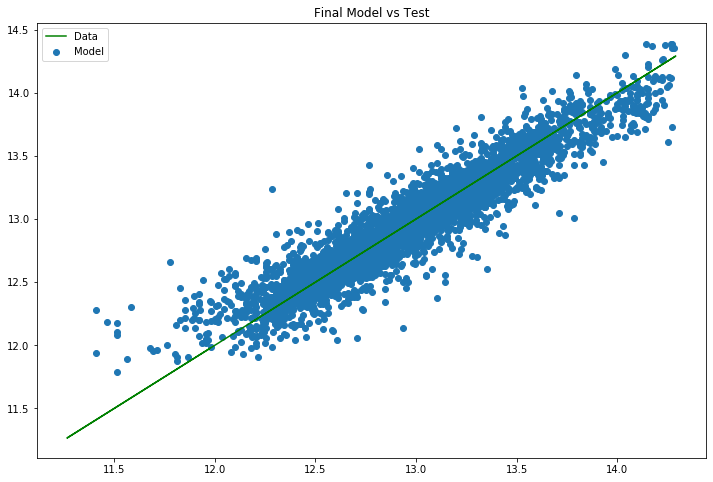

In [89]:
# Visualising the final model
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_hat_test, label='Model')
plt.plot(y_train, y_train, label='Data', color='g')
plt.title('Final Model vs Test')
plt.legend();

### Checking Homoscedasticity

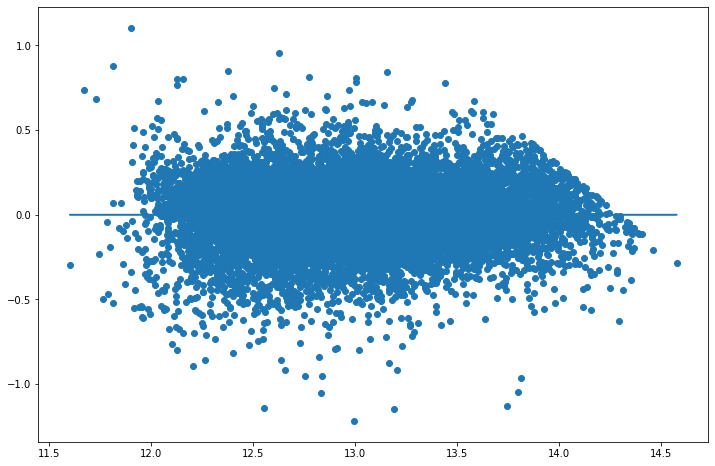

In [90]:
# Visualizing the errors
plt.figure(figsize=(12,8))
plt.scatter(model_final.predict(df_final2[predictors]), model_final.resid)
plt.plot(model_final.predict(df_final2[predictors]), [0 for i in range(len(df_final2))]);

The final model's errors looks homoscedastic. 

### Recursive Feature Elimination

In order to improve the accuracy of the model and reduce overfitting, recursive feature elimination(RFE) will be used. RFE helps to find the best performing feature subset.

In [91]:
# Choosing the best performing features
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

df_predictor = df_final2.drop('price', axis=1)

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=80)
selector = selector.fit(df_predictor, df_final2['price'])

selected_columns = df_predictor.columns.values[selector.support_]
selected_columns

array(['vw_3', 'vw_4', 'condition_5', 'waterfront', 'gr_3', 'gr_4',
       'gr_5', 'gr_6', 'gr_7', 'gr_8', 'gr_9', 'gr_10', 'gr_11', 'gr_12',
       'bedroom_1', 'bedroom_2', 'bedroom_3', 'bedroom_4', 'bedroom_5',
       'bedroom_6', 'bedroom_7', 'bedroom_8', 'bedroom_9', 'bedroom_10',
       'bedroom_11', 'sqft_living', 'sqft_living15', 'yr_built',
       'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008',
       'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98024',
       'zip_98027', 'zip_98028', 'zip_98029', 'zip_98033', 'zip_98034',
       'zip_98039', 'zip_98040', 'zip_98045', 'zip_98052', 'zip_98053',
       'zip_98056', 'zip_98059', 'zip_98065', 'zip_98070', 'zip_98072',
       'zip_98074', 'zip_98075', 'zip_98077', 'zip_98102', 'zip_98103',
       'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109',
       'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118',
       'zip_98119', 'zip_98122', 'zip_98125', 'zip_98126', 'zip_98133',


In [92]:
# Fitting the second model
outcome = 'price'
predictors = ['vw_3', 'vw_4', 'condition_5', 'waterfront', 'gr_3', 'gr_4',
       'gr_5', 'gr_6', 'gr_7', 'gr_8', 'gr_9', 'gr_10', 'gr_11', 'gr_12',
       'bedroom_1', 'bedroom_2', 'bedroom_3', 'bedroom_4', 'bedroom_5',
       'bedroom_6', 'bedroom_7', 'bedroom_8', 'bedroom_9', 'bedroom_10',
       'bedroom_11', 'sqft_living', 'sqft_living15', 'yr_built',
       'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008',
       'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98024',
       'zip_98027', 'zip_98028', 'zip_98029', 'zip_98033', 'zip_98034',
       'zip_98039', 'zip_98040', 'zip_98045', 'zip_98052', 'zip_98053',
       'zip_98056', 'zip_98059', 'zip_98065', 'zip_98070', 'zip_98072',
       'zip_98074', 'zip_98075', 'zip_98077', 'zip_98102', 'zip_98103',
       'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109',
       'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118',
       'zip_98119', 'zip_98122', 'zip_98125', 'zip_98126', 'zip_98133',
       'zip_98136', 'zip_98144', 'zip_98146', 'zip_98155', 'zip_98166',
       'zip_98177', 'zip_98199']
X2 = sm.add_constant(df_final2)
predictor_sum = '+'.join(predictors)
formula = outcome + '~' + predictor_sum 
model = ols(formula=formula, data=X2).fit()
model.summary()

/Users/esra/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     1459.
Date:                Sat, 21 Mar 2020   Prob (F-statistic):               0.00
Time:                        23:38:42   Log-Likelihood:                 5560.8
No. Observations:               18753   AIC:                        -1.096e+04
Df Residuals:                   18674   BIC:                        -1.034e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            19.1290      0.773     24.752      0.000      17.614      20.644
waterfront[T.1.0]     0.4825      0.031     15.427      0.000       0.421       0.544
vw_3                  0.1627      0.010     16.287      0.000       0.143       0.182
vw_4                  0.2399      0.016     14.581      0.000       0.208       0.272
condition_5           0.0814      0.005     16.055      0.000       0.071       0.091
gr_3                  2.1609      0.181     11.962      0.000       1.807       2.515
gr_4                  1.5856      0.086     18.504      0.000       1.418       1.754
gr_5                  1.5720      0.078     20.160      0.000       1.419       1.725
gr_6                  1.6791      0.078     21.532      0.000       1.526       1.832
gr_7                  1.7564      0.079     22.156      0.000       1.601       1.912
gr_8                  1.8480      0.081     22.951      0.000       1.690       2.006
gr_9                  1.9809      0.081     24.368      0.000       1.822       2.140
gr_10                 2.0600      0.082     25.192      0.000       1.900       2.220
gr_11                 2.1636      0.083     26.111      0.000       2.001       2.326
gr_12                 2.3225      0.102     22.689      0.000       2.122       2.523
bedroom_1             1.7865      0.074     24.048      0.000       1.641       1.932
bedroom_2             1.7872      0.073     24.357      0.000       1.643       1.931
bedroom_3             1.7756      0.073     24.187      0.000       1.632       1.920
bedroom_4             1.7767      0.073     24.240      0.000       1.633       1.920
bedroom_5             1.7635      0.073     24.019      0.000       1.620       1.907
bedroom_6             1.7477      0.074     23.646      0.000       1.603       1.893
bedroom_7             1.6581      0.081     20.496      0.000       1.500       1.817
bedroom_8             1.6570      0.092     18.069      0.000       1.477       1.837
bedroom_9             1.6524      0.099     16.682      0.000       1.458       1.847
bedroom_10            1.6077      0.120     13.371      0.000       1.372       1.843
bedroom_11            1.9166      0.179     10.700      0.000       1.566       2.268
sqft_living           0.4299      0.007     64.746      0.000       0.417       0.443
sqft_living15         0.1918      0.007     26.787      0.000       0.178       0.206
yr_built             -1.9511      0.121    -16.181      0.000      -2.187      -1.715
zip_98004             1.0110      0.013     80.346      0.000       0.986       1.036
zip_98005             0.6787      0.017     41.074      0.000       0.646       0.711
zip_98006             0.5742      0.009     60.616      0.000       0.556       0.593
zip_98007             0.5790      0.016     36.207      0.000       0.548

With 70 columns the final model's the R-squared value is 0.859 and the adjusted R-squared is 0.858.

### Cross Validation and Model Validation 

Let's re-train this time using this scikitlearn and then cross-validate our model. First split our dataset to train and test sets and apply basic validation.

In [96]:
y = df_final2[['price']]
x = df_final2[['vw_3', 'vw_4', 'condition_5', 'waterfront', 'gr_3', 'gr_4',
       'gr_5', 'gr_6', 'gr_7', 'gr_8', 'gr_9', 'gr_10', 'gr_11', 'gr_12',
       'bedroom_1', 'bedroom_2', 'bedroom_3', 'bedroom_4', 'bedroom_5',
       'bedroom_6', 'bedroom_7', 'bedroom_8', 'bedroom_9', 'bedroom_10',
       'bedroom_11', 'sqft_living', 'sqft_living15', 'yr_built',
       'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008',
       'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98024',
       'zip_98027', 'zip_98028', 'zip_98029', 'zip_98033', 'zip_98034',
       'zip_98039', 'zip_98040', 'zip_98045', 'zip_98052', 'zip_98053',
       'zip_98056', 'zip_98059', 'zip_98065', 'zip_98070', 'zip_98072',
       'zip_98074', 'zip_98075', 'zip_98077', 'zip_98102', 'zip_98103',
       'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109',
       'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118',
       'zip_98119', 'zip_98122', 'zip_98125', 'zip_98126', 'zip_98133',
       'zip_98136', 'zip_98144', 'zip_98146', 'zip_98155', 'zip_98166',
       'zip_98177', 'zip_98199']]

# Splitting for train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
print(len(x_train), len(x_test), len(y_train), len(y_test))

# fitting the model
linreg = LinearRegression()
linreg.fit(x_train, y_train)

# Predicting for train and test data 
y_hat_train = linreg.predict(x_train)
y_hat_test = linreg.predict(x_test)

# Calculating the residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

# calculating mean Squared error and root mean squared error for train and test data
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)
print('Train Root Mean Squared Error:', np.sqrt(train_mse))
print('Test Root Mean Squared Error:', np.sqrt(test_mse))

14064 4689 14064 4689
Train Mean Squared Error: 0.03206474980966027
Test Mean Squared Error: 0.0334903778600099
Train Root Mean Squared Error: 0.17906632796162508
Test Root Mean Squared Error: 0.18300376460611376


Let's train and cross-validate using KFold method and compare the results with the previous model.

In [160]:
from sklearn.model_selection import cross_val_predict, KFold, cross_validate
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

linreg = LinearRegression()

n_splits = 5
cv = KFold(n_splits=n_splits, random_state=33, shuffle=True)
scoring=('r2', 'neg_mean_squared_error', 'explained_variance')

cv_results = cross_validate(linreg, x, y, cv=cv, scoring=scoring, return_train_score=True)

df_results = pd.DataFrame.from_dict(cv_results,
                                    orient='index',
                                    columns=['Model '+str(x) for x in range(1,n_splits+1)])

def convert_num(df, row):
    df.loc[row, :] = df.loc[row, :].apply(lambda x: np.sqrt(np.abs(x)))
    df.loc[row, :] = df.loc[row, :].apply(lambda x: '%.2f' % x)
    return df
    
rows = ['test_neg_mean_squared_error', 'train_neg_mean_squared_error']
df_results = convert_num(df_results, rows[0])
df_results = convert_num(df_results, rows[1])
df_results.rename(
    index={
        'test_neg_mean_squared_error': 'test_root_mean_squared_error',
        'train_neg_mean_squared_error': 'train_root_mean_squared_error'
    }
    , inplace=True
)

df_results

Model 1         Model 2        Model 3  \
fit_time                        0.099381        0.076354      0.0762551   
score_time                     0.0751791        0.045836      0.0452096   
test_r2                         0.857516    -3.23424e+21    -2.8132e+20   
train_r2                        0.859129         0.85755       0.860865   
test_root_mean_squared_error        0.18  27609104239.60  7942383780.02   
train_root_mean_squared_error       0.18            0.18           0.18   
test_explained_variance         0.857539    -3.23337e+21   -2.81245e+20   
train_explained_variance        0.859129         0.85755       0.860865   

                                 Model 4    Model 5  
fit_time                       0.0890858  0.0823548  
score_time                     0.0555141   0.048007  
test_r2                         0.860464   0.853427  
train_r2                        0.858473   0.860188  
test_root_mean_squared_error        0.18       0.19  
train_root_mean_squared_error       0.18       0.18  
test_explained_variance          0.86051   0.853427  
train_explained_variance        0.858473   0.860188

Above is the summary of metrics associated with each model trained using 5 folds. As R-squared and root mean squared error values for Model 1, Model 3 and Model 5 are consistent with our model that we have trained using train-test split process, we can conclude that our feature and model selection process is validated.

## Interpreting

Q1:  What are the top five zip codes? How does location affect house prices?

- The top 5 zip codes by average price are 98039, 98004, 98040, 98112 and 98102.
- Location is one of the most important features in predicting house prices.
- As expected the northwest of the county has the highest price and highest variance.
- It can be concluded that the Bellevue, Seattle and Mercer Island have the highest average house prices.
- Location is a good predictor for the regression model.
- Northeast is the second in terms of highest price and variance.
- Southwest and Southeast parts of the county has lowest prices.
- The average price for northeast and northwest are almost the same.
- The average price of southeast is higher than southwest part of the county.

Q2: Which Season and months are best to buy a house?
- The best season to buy a house is winter.
- Fall has the highest price range followed by summer and spring.
- Spring has the highest average price followed by summer and fall.
- The average prices for each season are very close. The median values for each season are close, too. Season is not genuine as expected to be used as a predictor in the regression model.
- While October has the highest variance, February has the lowest variance.
- February has the lowest, April has the highest price average.
- There isn't a big difference between the median values and average price for months.
- Month is also not a good predictor for the regression model.

Model Features:

Baseline model uses 'is_renovated', 'waterfront','with_basement', 'view', 'condition', 'condition_4', spring, summer,'spring','summer', grade, 'sqft_living','sqft_lot','sqft_above','sqft_living15','sqft_lot15','bathrooms' and 'yr_built' to predict the house prices. Some of them are added as dummy variables to the dataframe. The baseline model explains variance for 61 %.

For refining the model zip codes and directions are added to the second model. With the location feature the model's R-squared value reaches to 87 %. To avoid multicollinearity 'sqft_above' value dropped and the R-squared value decreased by 0.001.

With Recursive Feature Elimination 70 features is chosen and the final model accounts for 85 % of the house prices.
Final model includes: 'vw_3', 'vw_4', 'condition_5', 'waterfront', 'gr_3', 'gr_4','gr_5', 'gr_6', 'gr_7', 'gr_8', 'gr_9', 'gr_10', 'gr_11', 'gr_12','bedroom_1', 'bedroom_2', 'bedroom_3', 'bedroom_4', 'bedroom_5', 'bedroom_6', 'bedroom_7', 'bedroom_8', 'bedroom_9', 'bedroom_10','bedroom_11', 'sqft_living', 'sqft_living15', 'yr_built', 'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008','zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98024','zip_98027', 'zip_98028', 'zip_98029', 'zip_98033', 'zip_98034','zip_98039', 'zip_98040', 'zip_98045', 'zip_98052', 'zip_98053','zip_98056', 'zip_98059', 'zip_98065', 'zip_98070', 'zip_98072','zip_98074', 'zip_98075', 'zip_98077', 'zip_98102', 'zip_98103','zip_98105', 'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109','zip_98112', 'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118','zip_98119', 'zip_98122', 'zip_98125', 'zip_98126', 'zip_98133','zip_98136', 'zip_98144', 'zip_98146', 'zip_98155', 'zip_98166','zip_98177', 'zip_98199' columns.

Cross validation is performed for each model trained using 5 folds. As R-squared and root mean squared error values for Model 1, Model 3 and Model 5 are consistent with our final model that we have trained using train-test split process, we can conclude that our feature and model selection process is validated.

The final model's mean squared values for test and train sets indicates that the final model is not ovetfitting or underfitting. 




